# COMPARING THE BEHAVIOR OF COMMODITIES IN THE CRISES OF 2008 AND 2020

In [3]:
import pyfolio as pf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import random
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18,8)
matplotlib.rcParams.update({'font.size' : 22})
from pandas_datareader import data as web
import warnings
warnings.filterwarnings('ignore')

C:\Users\artur\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


## Year: 2020

### First let's get the data from the Yahoo Finance website

In [4]:
tickers = ["GC=F", "SI=F", "PL=F", "HG=F", "PA=F", "CL=F", "HO=F", "NG=F", "RB=F", "BZ=F", "B0=F",
          "ZC=F", "ZO=F", "KE=F", "ZR=F", "ZM=F", "ZL=F", "GF=F", "HE=F", "LE=F", "CC=F", "KC=F", "CT=F",
          "LB=F", "OJ=F", "SB=F"]
data_yahoo = web.get_data_yahoo(tickers, start="2020-01-01", end="2020-12-31")["Adj Close"]

### Analyzing the data

In [5]:
data_yahoo.head()

Symbols,GC=F,SI=F,PL=F,HG=F,PA=F,CL=F,HO=F,NG=F,RB=F,BZ=F,...,GF=F,HE=F,LE=F,CC=F,KC=F,CT=F,SB=F,B0=F,LB=F,OJ=F
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,1524.500000,17.966000,978.599976,2.8330,1927.800049,61.180000,2.0241,2.122,1.7042,66.250000,...,144.649994,71.550003,125.775002,2532.0,127.099998,69.269997,13.13,NaN,NaN,NaN
2020-01-03,1549.199951,18.068001,984.500000,2.7985,1955.500000,63.049999,2.0614,2.130,1.7488,68.599998,...,143.350006,68.550003,124.724998,2519.0,126.349998,69.199997,13.31,NaN,NaN,NaN
2020-01-06,1566.199951,18.097000,960.400024,2.8005,1989.400024,63.270000,2.0339,2.135,1.7544,68.910004,...,147.425003,68.625000,127.275002,2484.0,122.150002,70.040001,13.73,NaN,NaN,NaN
2020-01-07,1571.800049,18.316000,966.000000,2.8040,2014.099976,62.700001,2.0324,2.162,1.7222,68.269997,...,145.899994,69.224998,126.525002,2533.0,122.400002,69.830002,13.59,NaN,NaN,NaN
2020-01-08,1557.400024,18.087999,959.000000,2.8190,2061.199951,59.610001,1.9582,2.141,1.6488,65.440002,...,146.824997,69.025002,126.349998,2501.0,119.150002,69.959999,13.47,NaN,NaN,NaN


In [6]:
data_yahoo.isnull().sum()

Symbols
GC=F      0
SI=F      0
PL=F      0
HG=F      0
PA=F      0
CL=F      0
HO=F      0
NG=F      0
RB=F      0
BZ=F      2
ZC=F      0
ZO=F      0
KE=F      0
ZR=F      0
ZM=F      0
ZL=F      0
GF=F      0
HE=F      0
LE=F      0
CC=F      0
KC=F      0
CT=F      0
SB=F      0
B0=F    251
LB=F    251
OJ=F    251
dtype: int64

### Let's remove the last three commodities, since they have missing data

In [7]:
data_yahoo_v1 = data_yahoo.drop(columns=["B0=F", "LB=F", "OJ=F"])

### We need to rename the column names, because the way it is found is not intuitive

In [8]:
mapa = {
    'GC=F' : 'ouro',
    'SI=F' : 'prata',
    "PL=F" : 'platina',
    "HG=F" : 'cobre',
    "PA=F" : 'paladio',
    "CL=F" : 'petroleo_cru',
    "HO=F" : 'oleo_aquecimento',
    "NG=F" : 'gas_natural',
    "RB=F" : 'gasolina_reformulada',
    "BZ=F" : 'petroleo_bruto_ultimo_dia_financiamento',
    "B0=F" : 'propano_mb',
    "ZC=F" : 'milho',
    "ZO=F" : 'aveia',
    "KE=F" : 'trigo_kansas',
    "ZR=F" : 'arroz_casca',
    "ZM=F" : 'farelo_soja',
    "ZL=F" : 'oleo_soja',
    "ZS=F" : 'soja',
    "GF=F" : 'gado',
    "HE=F" : 'porco_magro',
    "LE=F" : 'gado_vivo',
    "CC=F" : 'cacau',
    "KC=F" : 'cafe',
    "CT=F" : 'algodao',
    "LB=F" : 'madeira_serrada',
    "OJ=F" : 'suco_laranja',
    "SB=F" : 'acucar'
}

commodities_data = data_yahoo_v1.rename(columns=mapa)
commodities_data.head()

Symbols,ouro,prata,platina,cobre,paladio,petroleo_cru,oleo_aquecimento,gas_natural,gasolina_reformulada,petroleo_bruto_ultimo_dia_financiamento,...,arroz_casca,farelo_soja,oleo_soja,gado,porco_magro,gado_vivo,cacau,cafe,algodao,acucar
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,1524.500000,17.966000,978.599976,2.8330,1927.800049,61.180000,2.0241,2.122,1.7042,66.250000,...,1293.5,300.600006,34.970001,144.649994,71.550003,125.775002,2532.0,127.099998,69.269997,13.13
2020-01-03,1549.199951,18.068001,984.500000,2.7985,1955.500000,63.049999,2.0614,2.130,1.7488,68.599998,...,1299.5,296.100006,34.810001,143.350006,68.550003,124.724998,2519.0,126.349998,69.199997,13.31
2020-01-06,1566.199951,18.097000,960.400024,2.8005,1989.400024,63.270000,2.0339,2.135,1.7544,68.910004,...,1281.5,297.700012,34.240002,147.425003,68.625000,127.275002,2484.0,122.150002,70.040001,13.73
2020-01-07,1571.800049,18.316000,966.000000,2.8040,2014.099976,62.700001,2.0324,2.162,1.7222,68.269997,...,1283.5,296.399994,34.459999,145.899994,69.224998,126.525002,2533.0,122.400002,69.830002,13.59
2020-01-08,1557.400024,18.087999,959.000000,2.8190,2061.199951,59.610001,1.9582,2.141,1.6488,65.440002,...,1283.5,296.899994,34.270000,146.824997,69.025002,126.349998,2501.0,119.150002,69.959999,13.47


Now we need to calculate the cumulative return

In [9]:
retorno = commodities_data.pct_change()
retorno

Symbols,ouro,prata,platina,cobre,paladio,petroleo_cru,oleo_aquecimento,gas_natural,gasolina_reformulada,petroleo_bruto_ultimo_dia_financiamento,...,arroz_casca,farelo_soja,oleo_soja,gado,porco_magro,gado_vivo,cacau,cafe,algodao,acucar
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.016202,0.005677,0.006029,-0.012178,0.014369,0.030566,0.018428,0.003770,0.026171,0.035472,...,0.004639,-0.014970,-0.004575,-0.008987,-0.041929,-0.008348,-0.005134,-0.005901,-0.001011,0.013709
2020-01-06,0.010973,0.001605,-0.024479,0.000715,0.017336,0.003489,-0.013340,0.002347,0.003202,0.004519,...,-0.013851,0.005404,-0.016375,0.028427,0.001094,0.020445,-0.013894,-0.033241,0.012139,0.031555
2020-01-07,0.003576,0.012101,0.005831,0.001250,0.012416,-0.009009,-0.000738,0.012646,-0.018354,-0.009288,...,0.001561,-0.004367,0.006425,-0.010344,0.008743,-0.005893,0.019726,0.002047,-0.002998,-0.010197
2020-01-08,-0.009161,-0.012448,-0.007246,0.005350,0.023385,-0.049282,-0.036509,-0.009713,-0.042620,-0.041453,...,0.000000,0.001687,-0.005514,0.006340,-0.002889,-0.001383,-0.012633,-0.026552,0.001862,-0.008830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,0.004339,0.015334,0.007635,0.009665,0.006577,0.023394,0.024562,-0.061870,0.031728,0.022364,...,0.002022,0.014940,0.019729,0.002680,0.027641,0.014503,0.008679,0.002818,0.017642,0.019945
2020-12-28,0.001334,0.024628,0.025585,0.005068,0.005459,-0.010391,-0.012354,-0.116181,-0.010347,-0.006641,...,-0.031881,-0.014008,0.008948,0.005168,-0.019897,0.010051,0.001173,-0.009635,0.002758,0.010115
2020-12-29,0.001332,-0.012169,0.012953,-0.004762,-0.003206,0.007980,0.005274,0.070282,0.014769,0.004522,...,0.017507,0.028172,0.018217,-0.009752,0.010526,-0.008846,-0.020703,0.016619,0.008644,0.004005


In [11]:
retorno_acumulado = (1+ retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

Symbols,ouro,prata,platina,cobre,paladio,petroleo_cru,oleo_aquecimento,gas_natural,gasolina_reformulada,petroleo_bruto_ultimo_dia_financiamento,...,arroz_casca,farelo_soja,oleo_soja,gado,porco_magro,gado_vivo,cacau,cafe,algodao,acucar
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-01-03,1.016202,1.005677,1.006029,0.987822,1.014369,1.030566,1.018428,1.003770,1.026171,1.035472,...,1.004639,0.985030,0.995425,0.991013,0.958071,0.991652,0.994866,0.994099,0.998989,1.013709
2020-01-06,1.027353,1.007292,0.981402,0.988528,1.031954,1.034161,1.004842,1.006126,1.029457,1.040151,...,0.990723,0.990353,0.979125,1.019184,0.959119,1.011926,0.981043,0.961054,1.011116,1.045697
2020-01-07,1.031027,1.019481,0.987124,0.989763,1.044766,1.024845,1.004101,1.018850,1.010562,1.030491,...,0.992269,0.986028,0.985416,1.008642,0.967505,1.005963,1.000395,0.963021,1.008084,1.035034
2020-01-08,1.021581,1.006791,0.979971,0.995058,1.069198,0.974338,0.967442,1.008954,0.967492,0.987774,...,0.992269,0.987691,0.979983,1.015036,0.964710,1.004572,0.987757,0.937451,1.009961,1.025895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,1.229715,1.437382,1.038422,1.253795,1.206712,0.786532,0.739835,1.229029,0.810938,0.772830,...,0.957866,1.401198,1.182442,0.969755,0.948288,0.889883,1.009874,0.979937,1.099177,1.129474
2020-12-28,1.231355,1.472782,1.064991,1.260148,1.213300,0.778359,0.730695,1.086239,0.802547,0.767698,...,0.927329,1.381570,1.193023,0.974767,0.929420,0.898827,1.011058,0.970496,1.102209,1.140899
2020-12-29,1.232994,1.454859,1.078786,1.254148,1.209410,0.784570,0.734549,1.162582,0.814400,0.771170,...,0.943564,1.420492,1.214755,0.965261,0.939203,0.890877,0.990126,0.986625,1.111737,1.145468


In [12]:
retorno_anual = (retorno_acumulado -1) *100
retorno_anual

Symbols,ouro,prata,platina,cobre,paladio,petroleo_cru,oleo_aquecimento,gas_natural,gasolina_reformulada,petroleo_bruto_ultimo_dia_financiamento,...,arroz_casca,farelo_soja,oleo_soja,gado,porco_magro,gado_vivo,cacau,cafe,algodao,acucar
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03,1.620200,0.567746,0.602905,-1.217786,1.436868,3.056553,1.842788,0.377009,2.617064,3.547168,...,0.463858,-1.497006,-0.457535,-0.898713,-4.192872,-0.834827,-0.513428,-0.590087,-0.101053,1.370909
2020-01-06,2.735320,0.729158,-1.859795,-1.147195,3.195351,3.416149,0.484164,0.612630,2.945663,4.015100,...,-0.927716,-0.964735,-2.087502,1.918430,-4.088054,1.192606,-1.895735,-3.894569,1.111599,4.569683
2020-01-07,3.102660,1.948126,-1.287551,-1.023651,4.476602,2.484473,0.410050,1.885012,1.056214,3.049052,...,-0.773096,-1.397210,-1.458399,0.864155,-3.249482,0.596303,0.039494,-3.697873,0.808438,3.503428
2020-01-08,2.158086,0.679059,-2.002859,-0.494174,6.919800,-2.566198,-3.255772,0.895384,-3.250793,-1.222638,...,-0.773096,-1.230876,-2.001718,1.503632,-3.529003,0.457163,-1.224329,-6.254915,0.996106,2.589491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,22.971463,43.738172,3.842227,25.379460,20.671231,-21.346848,-26.016506,22.902925,-18.906235,-22.716980,...,-4.213375,40.119762,18.244201,-3.024542,-5.171215,-11.011726,0.987362,-2.006291,9.917718,12.947447
2020-12-28,23.135451,47.278190,6.499078,26.014825,21.330010,-22.164108,-26.930491,8.623944,-19.745338,-23.230188,...,-7.267105,38.157012,19.302258,-2.523328,-7.058005,-10.117272,1.105845,-2.950433,10.220878,14.089866
2020-12-29,23.299439,45.485924,7.878600,25.414756,20.940966,-21.542988,-26.545136,16.258248,-18.560030,-22.883019,...,-5.643603,42.049232,21.475545,-3.473898,-6.079673,-10.912342,-0.987362,-1.337527,11.173677,14.546838


In [13]:
acumulado_anual = retorno_anual.iloc[-1::]
pd.options.display.max_columns = None
acumulado_anual.head()

Symbols,ouro,prata,platina,cobre,paladio,petroleo_cru,oleo_aquecimento,gas_natural,gasolina_reformulada,petroleo_bruto_ultimo_dia_financiamento,milho,aveia,trigo_kansas,arroz_casca,farelo_soja,oleo_soja,gado,porco_magro,gado_vivo,cacau,cafe,algodao,acucar
Date,,,,,,,,,,,,,,,,,,,,,,,
2020-12-31,24.178418,46.565743,9.891687,24.038122,27.01006,-20.693037,-27.063883,19.651275,-17.357116,-22.50566,23.627075,21.057047,24.368882,-4.136065,44.510973,23.906206,-3.940544,-1.781973,-10.196783,2.804107,0.904801,12.776103,17.974102


In [14]:
acumulado_anual.transpose()

Date,2020-12-31
Symbols,
ouro,24.178418
prata,46.565743
platina,9.891687
cobre,24.038122
paladio,27.010060
petroleo_cru,-20.693037
oleo_aquecimento,-27.063883
gas_natural,19.651275
gasolina_reformulada,-17.357116


In [15]:
data_0 = {'COMMODITIES': ['ouro', 'prata', 'platina' ,'cobre', 'paladio' ,'petroleo_cru' ,'oleo_aquecimento' ,'gas_natural' ,
                         'gasolina_reformulada' ,'petroleo_bruto_ultimo_dia_financiamento' ,'milho' ,'aveia',
                         'trigo_kansas' ,'arroz_casca' ,'farelo_soja' ,'oleo_soja' ,'gado', 'porco_magro' ,
                         'gado_vivo' ,'cacau' ,'cafe' ,'algodao' ,'acucar'],
          'RETORNO_ANUAL' : [24.178418,46.565743,9.891687,24.038122,27.010060,-20.693037,-27.063883,
                             19.651275,-17.357116, -22.505660,23.627075,21.057047,24.368882,
                             -4.136065,44.510973,23.906206,-3.940544, -1.781973, -10.196783, 2.804107,
                             0.904801, 12.776103, 17.974102 ]}

In [16]:
ret= pd.DataFrame(data_0)
ret

,COMMODITIES,RETORNO_ANUAL
0,ouro,24.178418
1,prata,46.565743
2,platina,9.891687
3,cobre,24.038122
4,paladio,27.010060
5,petroleo_cru,-20.693037
6,oleo_aquecimento,-27.063883
7,gas_natural,19.651275
8,gasolina_reformulada,-17.357116
9,petroleo_bruto_ultimo_dia_financiamento,-22.505660


### Now that we have the annual returns for all commodities, we can see which ones performed well during the year of 2020.

# ANNUAL COMMODITIES RETURN - 2020

Text(0.5, 1.0, 'RETORNO ANUAL (%) - 2020')

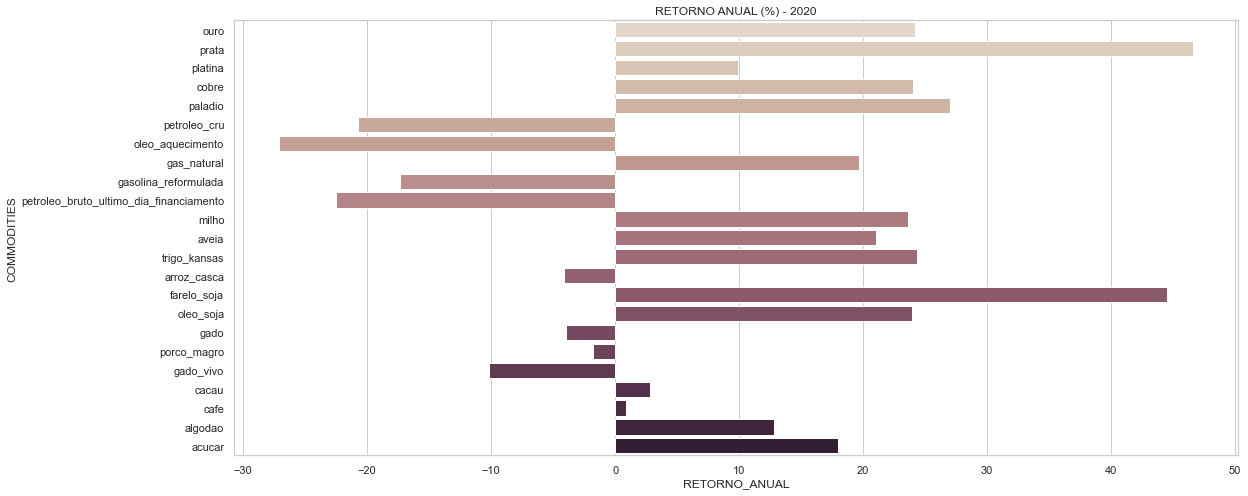

In [17]:
sns.set_theme(style="whitegrid")
sns.barplot(y='COMMODITIES', x='RETORNO_ANUAL',
            data=ret, palette='ch:.25').set_title('RETORNO ANUAL (%) - 2020')


### As we can see, in the year 2020, silver was the most valued commodity. What can explain this behavior are basically three factors:
####   1. the injection of more money into the economy by central banks around the world, as part of attempts to contain the impact of the coronavirus crisis. This monetary easing has created further uncertainty about the health of the financial system, with concerns about "an increase in debt that will need to be resolved".
####   2. the fact that real yields operate in negative territory, which means that the return that investors obtain with the securities is equal to or less than the inflation rate.
####    3. more than half of the silver demand comes from industrial applications in electronics, medical equipment and solar power generation.

#### Another commodity that had an expressive appreciation was soybean oil. The rise in prices was stimulated by heated demand and the rise in the dollar.

#### Regarding commodities such as crude oil, heating oil, etc., the negative return to the drop was due to the drop in demand due to the pandemic of COVID-19.

# COMMODTIES CORRELATION MATRIX IN 2020

### Here we can analyze the correlation between commodities

<AxesSubplot:title={'center':'CORRELAÇÃO ENTRE AS COMMODITIES'}, xlabel='Symbols', ylabel='Symbols'>

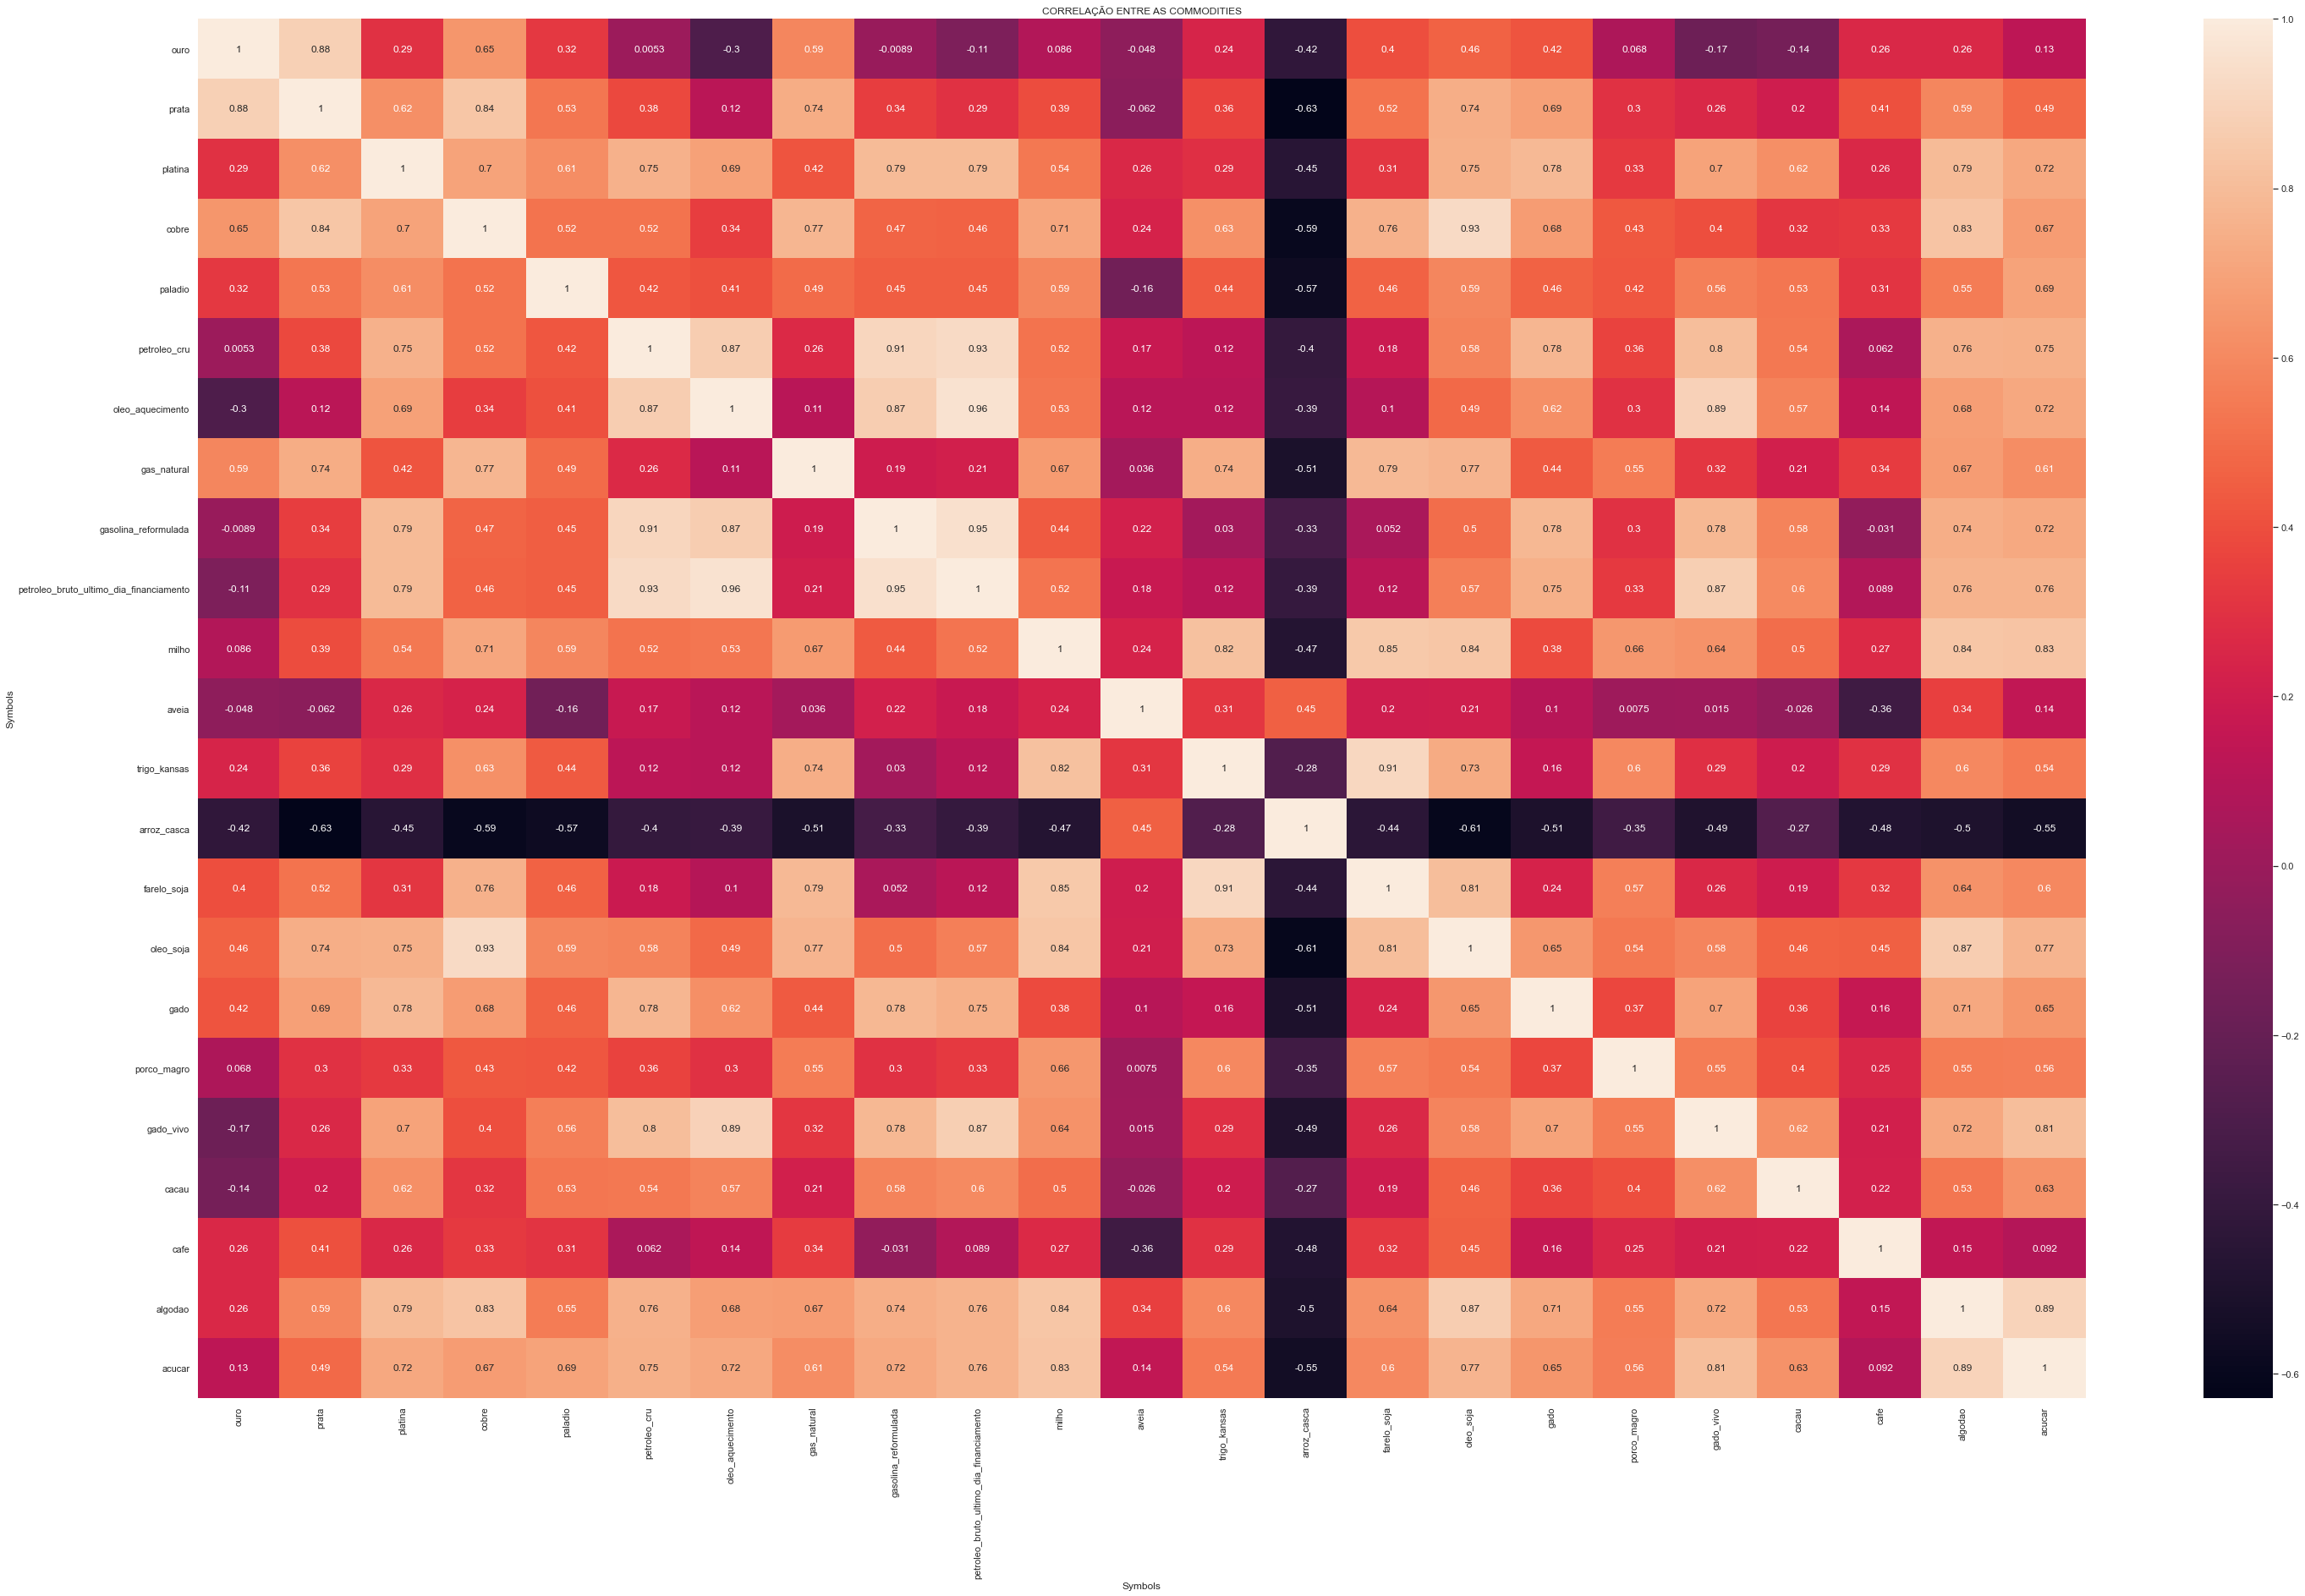

In [18]:
plt.figure(figsize=(50,30))
plt.title("CORRELAÇÃO ENTRE AS COMMODITIES")
sns.heatmap(data=commodities_data.corr(), annot=True)

### As the visualization of the heatmap was not presentable due to the quantity of commodities, we will use a data frame and check if there is any correlation as high as 99%

In [19]:
matriz_correl = commodities_data.corr()
matriz_correl = matriz_correl[matriz_correl >0.99]
matriz_correl

Symbols,ouro,prata,platina,cobre,paladio,petroleo_cru,oleo_aquecimento,gas_natural,gasolina_reformulada,petroleo_bruto_ultimo_dia_financiamento,milho,aveia,trigo_kansas,arroz_casca,farelo_soja,oleo_soja,gado,porco_magro,gado_vivo,cacau,cafe,algodao,acucar
Symbols,,,,,,,,,,,,,,,,,,,,,,,
ouro,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prata,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
platina,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cobre,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paladio,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
petroleo_cru,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oleo_aquecimento,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gas_natural,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gasolina_reformulada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
matriz_correl_v1 = matriz_correl.sum()
matriz_correl_v1

Symbols
ouro                                       1.0
prata                                      1.0
platina                                    1.0
cobre                                      1.0
paladio                                    1.0
petroleo_cru                               1.0
oleo_aquecimento                           1.0
gas_natural                                1.0
gasolina_reformulada                       1.0
petroleo_bruto_ultimo_dia_financiamento    1.0
milho                                      1.0
aveia                                      1.0
trigo_kansas                               1.0
arroz_casca                                1.0
farelo_soja                                1.0
oleo_soja                                  1.0
gado                                       1.0
porco_magro                                1.0
gado_vivo                                  1.0
cacau                                      1.0
cafe                                       1.0
algod

## Year: 2008

### First let's get the data from the Yahoo Finance website

In [21]:
ticker = ["GC=F", "SI=F", "PL=F", "HG=F", "PA=F", "CL=F", "HO=F", "NG=F", "RB=F", "BZ=F", "B0=F",
          "ZC=F", "ZO=F", "KE=F", "ZR=F", "ZM=F", "ZL=F", "GF=F", "HE=F", "LE=F", "CC=F", "KC=F", "CT=F",
          "LB=F", "OJ=F", "SB=F"]
data_yahoo_v2 = web.get_data_yahoo(tickers, start="2008-01-01", end="2008-12-31")["Adj Close"]

In [22]:
data_yahoo_v2.head()

Symbols,GC=F,SI=F,PL=F,HG=F,PA=F,CL=F,HO=F,NG=F,RB=F,BZ=F,ZC=F,ZO=F,KE=F,ZR=F,ZM=F,ZL=F,GF=F,HE=F,LE=F,CC=F,KC=F,CT=F,SB=F,B0=F,LB=F,OJ=F
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-01-02,857.000000,15.167,1547.000000,3.0505,NaN,99.620003,2.7404,7.850,2.5689,97.839996,462.50,312.00,936.00,1396.0,338.000000,49.959999,104.425003,57.174999,96.250000,2097.0,134.000000,68.879997,10.73,NaN,NaN,NaN
2008-01-03,866.400024,15.382,1541.800049,3.1730,NaN,99.180000,2.7191,7.674,2.5414,97.599998,466.00,325.50,965.50,1395.0,344.100006,50.500000,101.800003,56.474998,94.775002,2120.0,135.199997,68.709999,11.14,NaN,NaN,NaN
2008-01-04,863.099976,15.346,1539.099976,3.1415,NaN,97.910004,2.6835,7.841,2.5110,96.790001,466.75,329.75,945.75,1400.5,342.000000,50.549999,100.324997,56.400002,94.550003,2098.0,132.699997,68.690002,11.32,NaN,NaN,NaN
2008-01-07,859.599976,15.180,1524.199951,3.1250,NaN,95.089996,2.5935,7.879,2.4298,94.389999,466.25,326.50,915.75,1394.0,337.899994,50.200001,100.425003,55.700001,94.599998,2131.0,131.399994,68.949997,11.37,NaN,NaN,NaN
2008-01-08,878.000000,15.707,1553.599976,3.2735,NaN,96.330002,2.6363,7.967,2.4739,95.540001,478.75,332.50,909.25,1430.0,346.500000,50.509998,100.224998,55.875000,94.074997,2156.0,135.449997,69.430000,11.37,NaN,NaN,NaN


In [23]:
data_yahoo_v2.isnull().sum()

Symbols
GC=F      0
SI=F      0
PL=F    136
HG=F      0
PA=F    116
CL=F      0
HO=F      0
NG=F      0
RB=F      0
BZ=F      3
ZC=F      0
ZO=F      0
KE=F      0
ZR=F      0
ZM=F      0
ZL=F      0
GF=F      0
HE=F      0
LE=F      1
CC=F      0
KC=F      0
CT=F      0
SB=F      0
B0=F    249
LB=F    249
OJ=F    249
dtype: int64

In [24]:
# vamos retirar os 3 ultimos commodities
data_yahoo_v3 = data_yahoo_v2.drop(columns=["B0=F", "LB=F", "OJ=F", "PA=F"])

In [25]:
mapa = {
    'GC=F' : 'ouro',
    'SI=F' : 'prata',
    "PL=F" : 'platina',
    "HG=F" : 'cobre',
    "PA=F" : 'paladio',
    "CL=F" : 'petroleo_cru',
    "HO=F" : 'oleo_aquecimento',
    "NG=F" : 'gas_natural',
    "RB=F" : 'gasolina_reformulada',
    "BZ=F" : 'petroleo_bruto_ultimo_dia_financiamento',
    "B0=F" : 'propano_mb',
    "ZC=F" : 'milho',
    "ZO=F" : 'aveia',
    "KE=F" : 'trigo_kansas',
    "ZR=F" : 'arroz_casca',
    "ZM=F" : 'farelo_soja',
    "ZL=F" : 'oleo_soja',
    "ZS=F" : 'soja',
    "GF=F" : 'gado',
    "HE=F" : 'porco_magro',
    "LE=F" : 'gado_vivo',
    "CC=F" : 'cacau',
    "KC=F" : 'cafe',
    "CT=F" : 'algodao',
    "LB=F" : 'madeira_serrada',
    "OJ=F" : 'suco_laranja',
    "SB=F" : 'acucar'
}

commodities_data_v1 = data_yahoo_v3.rename(columns=mapa)
commodities_data_v1.head()

Symbols,ouro,prata,platina,cobre,petroleo_cru,oleo_aquecimento,gas_natural,gasolina_reformulada,petroleo_bruto_ultimo_dia_financiamento,milho,aveia,trigo_kansas,arroz_casca,farelo_soja,oleo_soja,gado,porco_magro,gado_vivo,cacau,cafe,algodao,acucar
Date,,,,,,,,,,,,,,,,,,,,,,
2008-01-02,857.000000,15.167,1547.000000,3.0505,99.620003,2.7404,7.850,2.5689,97.839996,462.50,312.00,936.00,1396.0,338.000000,49.959999,104.425003,57.174999,96.250000,2097.0,134.000000,68.879997,10.73
2008-01-03,866.400024,15.382,1541.800049,3.1730,99.180000,2.7191,7.674,2.5414,97.599998,466.00,325.50,965.50,1395.0,344.100006,50.500000,101.800003,56.474998,94.775002,2120.0,135.199997,68.709999,11.14
2008-01-04,863.099976,15.346,1539.099976,3.1415,97.910004,2.6835,7.841,2.5110,96.790001,466.75,329.75,945.75,1400.5,342.000000,50.549999,100.324997,56.400002,94.550003,2098.0,132.699997,68.690002,11.32
2008-01-07,859.599976,15.180,1524.199951,3.1250,95.089996,2.5935,7.879,2.4298,94.389999,466.25,326.50,915.75,1394.0,337.899994,50.200001,100.425003,55.700001,94.599998,2131.0,131.399994,68.949997,11.37
2008-01-08,878.000000,15.707,1553.599976,3.2735,96.330002,2.6363,7.967,2.4739,95.540001,478.75,332.50,909.25,1430.0,346.500000,50.509998,100.224998,55.875000,94.074997,2156.0,135.449997,69.430000,11.37


In [26]:
retorno_v1 = commodities_data_v1.pct_change()
retorno_v1

Symbols,ouro,prata,platina,cobre,petroleo_cru,oleo_aquecimento,gas_natural,gasolina_reformulada,petroleo_bruto_ultimo_dia_financiamento,milho,aveia,trigo_kansas,arroz_casca,farelo_soja,oleo_soja,gado,porco_magro,gado_vivo,cacau,cafe,algodao,acucar
Date,,,,,,,,,,,,,,,,,,,,,,
2008-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,0.010969,0.014176,-0.003361,0.040157,-0.004417,-0.007773,-0.022420,-0.010705,-0.002453,0.007568,0.043269,0.031517,-0.000716,0.018047,0.010809,-0.025138,-0.012243,-0.015325,0.010968,0.008955,-0.002468,0.038211
2008-01-04,-0.003809,-0.002340,-0.001751,-0.009928,-0.012805,-0.013093,0.021762,-0.011962,-0.008299,0.001609,0.013057,-0.020456,0.003943,-0.006103,0.000990,-0.014489,-0.001328,-0.002374,-0.010377,-0.018491,-0.000291,0.016158
2008-01-07,-0.004055,-0.010817,-0.009681,-0.005252,-0.028802,-0.033538,0.004846,-0.032338,-0.024796,-0.001071,-0.009856,-0.031721,-0.004641,-0.011988,-0.006924,0.000997,-0.012411,0.000529,0.015729,-0.009797,0.003785,0.004417
2008-01-08,0.021405,0.034717,0.019289,0.047520,0.013040,0.016503,0.011169,0.018150,0.012184,0.026810,0.018377,-0.007098,0.025825,0.025451,0.006175,-0.001992,0.003142,-0.005550,0.011732,0.030822,0.006962,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-22,0.011717,0.000924,0.000000,0.009195,0.178329,-0.036279,-0.007499,-0.085732,-0.057955,0.002626,0.000000,0.010720,0.015788,0.029907,0.011111,-0.001337,-0.012966,-0.001452,-0.012717,-0.023434,0.014592,-0.009132
2008-12-23,-0.010636,-0.055037,0.000000,-0.048595,-0.023302,-0.010809,0.083680,-0.034078,-0.026297,0.034054,-0.018265,0.008061,-0.000331,0.021416,0.008727,0.002410,0.004926,-0.003780,0.034738,-0.008306,0.002833,0.000000
2008-12-26,0.039656,0.026385,0.000000,0.017159,-0.032581,-0.061794,0.015513,-0.014019,-0.049306,0.044332,0.074419,0.037458,-0.001323,0.057925,0.051586,-0.008280,-0.036765,0.002919,-0.009430,0.008841,0.003477,0.011981


In [27]:
retorno_acumulado_v1 = (1+ retorno_v1).cumprod()
retorno_acumulado_v1.iloc[0] = 1
retorno_acumulado_v1

Symbols,ouro,prata,platina,cobre,petroleo_cru,oleo_aquecimento,gas_natural,gasolina_reformulada,petroleo_bruto_ultimo_dia_financiamento,milho,aveia,trigo_kansas,arroz_casca,farelo_soja,oleo_soja,gado,porco_magro,gado_vivo,cacau,cafe,algodao,acucar
Date,,,,,,,,,,,,,,,,,,,,,,
2008-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2008-01-03,1.010969,1.014176,0.996639,1.040157,0.995583,0.992227,0.977580,0.989295,0.997547,1.007568,1.043269,1.031517,0.999284,1.018047,1.010809,0.974862,0.987757,0.984675,1.010968,1.008955,0.997532,1.038211
2008-01-04,1.007118,1.011802,0.994893,1.029831,0.982835,0.979237,0.998854,0.977461,0.989268,1.009189,1.056891,1.010417,1.003223,1.011834,1.011809,0.960737,0.986445,0.982338,1.000477,0.990298,0.997242,1.054986
2008-01-07,1.003034,1.000857,0.985262,1.024422,0.954527,0.946395,1.003694,0.945852,0.964738,1.008108,1.046474,0.978365,0.998567,0.999704,1.004804,0.961695,0.974202,0.982857,1.016214,0.980597,1.001016,1.059646
2008-01-08,1.024504,1.035604,1.004266,1.073103,0.966974,0.962013,1.014904,0.963019,0.976492,1.035135,1.065705,0.971421,1.024355,1.025148,1.011009,0.959780,0.977263,0.977403,1.028135,1.010821,1.007985,1.059646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-22,0.987398,0.713984,0.524305,0.431733,0.400622,0.489527,0.674395,0.344973,0.423651,0.825405,0.701923,0.629541,1.083095,0.815089,0.619295,0.894182,1.065151,0.893247,1.221745,0.808582,0.666231,1.011184
2008-12-23,0.976896,0.674688,0.524305,0.410752,0.391287,0.484236,0.730828,0.333217,0.412510,0.853514,0.689103,0.634615,1.082736,0.832544,0.624700,0.896337,1.070398,0.889870,1.264187,0.801866,0.668119,1.011184
2008-12-26,1.015636,0.692490,0.524305,0.417800,0.378538,0.454313,0.742166,0.328545,0.392171,0.891351,0.740385,0.658387,1.081304,0.880769,0.656926,0.888915,1.031045,0.892468,1.252265,0.808955,0.670441,1.023299


In [28]:
retorno_anual_v1 = (retorno_acumulado_v1 -1) *100
retorno_anual_v1

Symbols,ouro,prata,platina,cobre,petroleo_cru,oleo_aquecimento,gas_natural,gasolina_reformulada,petroleo_bruto_ultimo_dia_financiamento,milho,aveia,trigo_kansas,arroz_casca,farelo_soja,oleo_soja,gado,porco_magro,gado_vivo,cacau,cafe,algodao,acucar
Date,,,,,,,,,,,,,,,,,,,,,,
2008-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-01-03,1.096852,1.417552,-0.336131,4.015741,-0.441681,-0.777262,-2.242040,-1.070503,-0.245296,0.756757,4.326923,3.151709,-0.071633,1.804736,1.080867,-2.513766,-1.224313,-1.532466,1.096805,0.895520,-0.246803,3.821070
2008-01-04,0.711782,1.180193,-0.510667,2.983120,-1.716522,-2.076340,-0.114647,-2.253890,-1.073176,0.918919,5.689103,1.041667,0.322350,1.183432,1.180945,-3.926269,-1.355484,-1.766231,0.047687,-0.970152,-0.275835,5.498604
2008-01-07,0.303381,0.085716,-1.473823,2.442225,-4.547286,-5.360538,0.369430,-5.414772,-3.526162,0.810811,4.647436,-2.163462,-0.143266,-0.029588,0.480388,-3.830500,-2.579796,-1.714287,1.621364,-1.940303,0.101626,5.964589
2008-01-08,2.450408,3.560361,0.426631,7.310279,-3.302551,-3.798715,1.490447,-3.698082,-2.350772,3.513514,6.570513,-2.857906,2.435530,2.514793,1.100879,-4.022030,-2.273720,-2.259743,2.813543,1.082087,0.798495,5.964589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-22,-1.260209,-28.601565,-47.569491,-56.826747,-59.937765,-51.047292,-32.560507,-65.502745,-57.634912,-17.459459,-29.807692,-37.045940,8.309456,-18.491124,-38.070454,-10.581760,6.515089,-10.675326,22.174535,-19.141792,-33.376886,1.118368
2008-12-23,-2.310384,-32.531154,-47.569491,-58.924765,-60.871313,-51.576413,-26.917197,-66.678346,-58.748976,-14.648649,-31.089744,-36.538462,8.273639,-16.745564,-37.530025,-10.366296,7.039793,-11.012985,26.418693,-19.813435,-33.188150,1.118368
2008-12-26,1.563597,-30.750970,-47.569491,-58.219962,-62.146157,-54.568677,-25.783436,-67.145473,-60.782910,-10.864865,-25.961538,-34.161325,8.130372,-11.923073,-34.307445,-11.108457,3.104506,-10.753245,25.226514,-19.104476,-32.955862,2.329916


In [29]:
acumulado_anual_v1 = retorno_anual_v1.iloc[248::]
pd.options.display.max_columns = None
acumulado_anual_v1.head()

Symbols,ouro,prata,platina,cobre,petroleo_cru,oleo_aquecimento,gas_natural,gasolina_reformulada,petroleo_bruto_ultimo_dia_financiamento,milho,aveia,trigo_kansas,arroz_casca,farelo_soja,oleo_soja,gado,porco_magro,gado_vivo,cacau,cafe,algodao,acucar
Date,,,,,,,,,,,,,,,,,,,,,,
2008-12-30,1.435238,-27.770818,-41.182933,-57.154562,-60.821123,-52.999564,-25.363054,-65.537781,-58.963611,-14.324324,-32.692308,-33.573718,10.136103,-11.83432,-35.72858,-10.007186,4.45999,-10.779221,20.600858,-19.738804,-30.357138,5.219016


In [30]:
A = acumulado_anual_v1.transpose()

In [31]:
A.head()

Date,2008-12-30
Symbols,
ouro,1.435238
prata,-27.770818
platina,-41.182933
cobre,-57.154562
petroleo_cru,-60.821123


In [32]:
data = {'COMMODITIES': ['ouro', 'prata', 'platina' ,'cobre' ,'petroleo_cru' ,'oleo_aquecimento' ,'gas_natural' ,
                         'gasolina_reformulada' ,'petroleo_bruto_ultimo_dia_financiamento' ,'milho' ,'aveia',
                         'trigo_kansas' ,'arroz_casca' ,'farelo_soja' ,'oleo_soja' ,'gado', 'porco_magro' ,
                         'gado_vivo' ,'cacau' ,'cafe' ,'algodao' ,'acucar'],
                                 
        'RETORNO_ANUAL' : [1.435238, -27.770818, -41.182933, -57.154562, -60.821123, 
                  -52.999564, -25.363054, -65.537781, -58.963611, -14.324324, -32.692308, -33.573718,
                  10.136103, -11.834320, -35.728580, -10.007186, 4.459990, -10.779221, 20.600858,
                  -19.738804, -30.357138, 5.219016]}
        
                         
                         

In [33]:
ret_v1= pd.DataFrame(data)
ret_v1

,COMMODITIES,RETORNO_ANUAL
0,ouro,1.435238
1,prata,-27.770818
2,platina,-41.182933
3,cobre,-57.154562
4,petroleo_cru,-60.821123
5,oleo_aquecimento,-52.999564
6,gas_natural,-25.363054
7,gasolina_reformulada,-65.537781
8,petroleo_bruto_ultimo_dia_financiamento,-58.963611
9,milho,-14.324324


Text(0.5, 1.0, 'RETORNO ANUAL (%) - 2008')

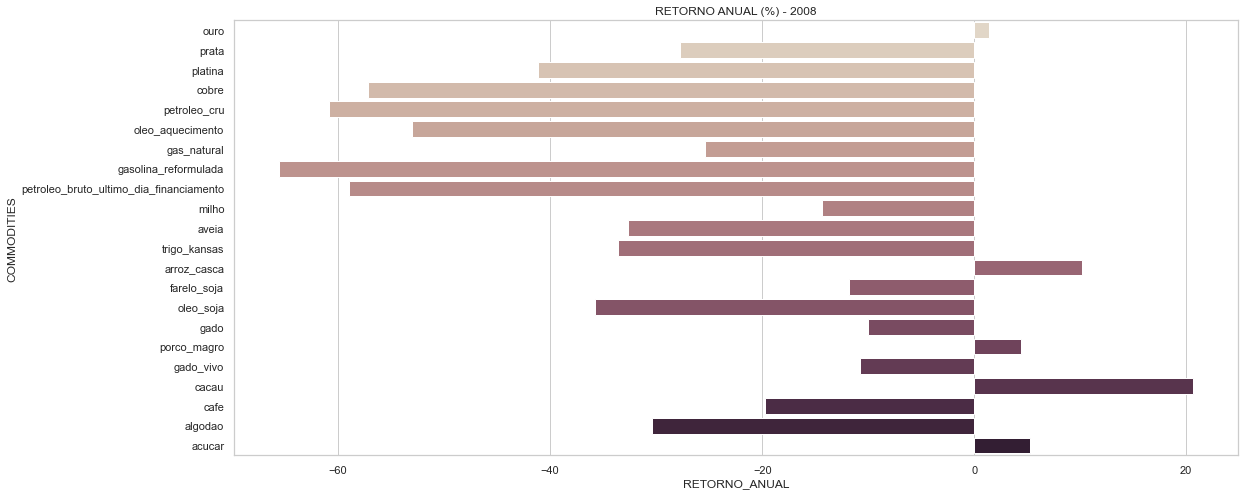

In [34]:
sns.barplot(y='COMMODITIES', x='RETORNO_ANUAL',
            data=ret_v1, palette='ch:.25').set_title('RETORNO ANUAL (%) - 2008')

### Unlike what happened in the 2020 crisis, caused by the pandemic of COIVD-19, in the 2008 crisis we had a slowdown in the world economy resulting in a crisis of demand which reduced the demand for practically all commodities.
### Among the biggest declines, we had reformulated gasoline with a drop of 65.53% in the year, followed by crude oil with a drop of 60.82%. At the opposite end we have cocoa with a 20% increase in the year, followed by rough rice with an appreciation of about 10.13%.

# COMMODTIES CORRELATION MATRIX IN 2008

<AxesSubplot:title={'center':'CORRELAÇÃO ENTRE AS COMMODITIES'}, xlabel='Symbols', ylabel='Symbols'>

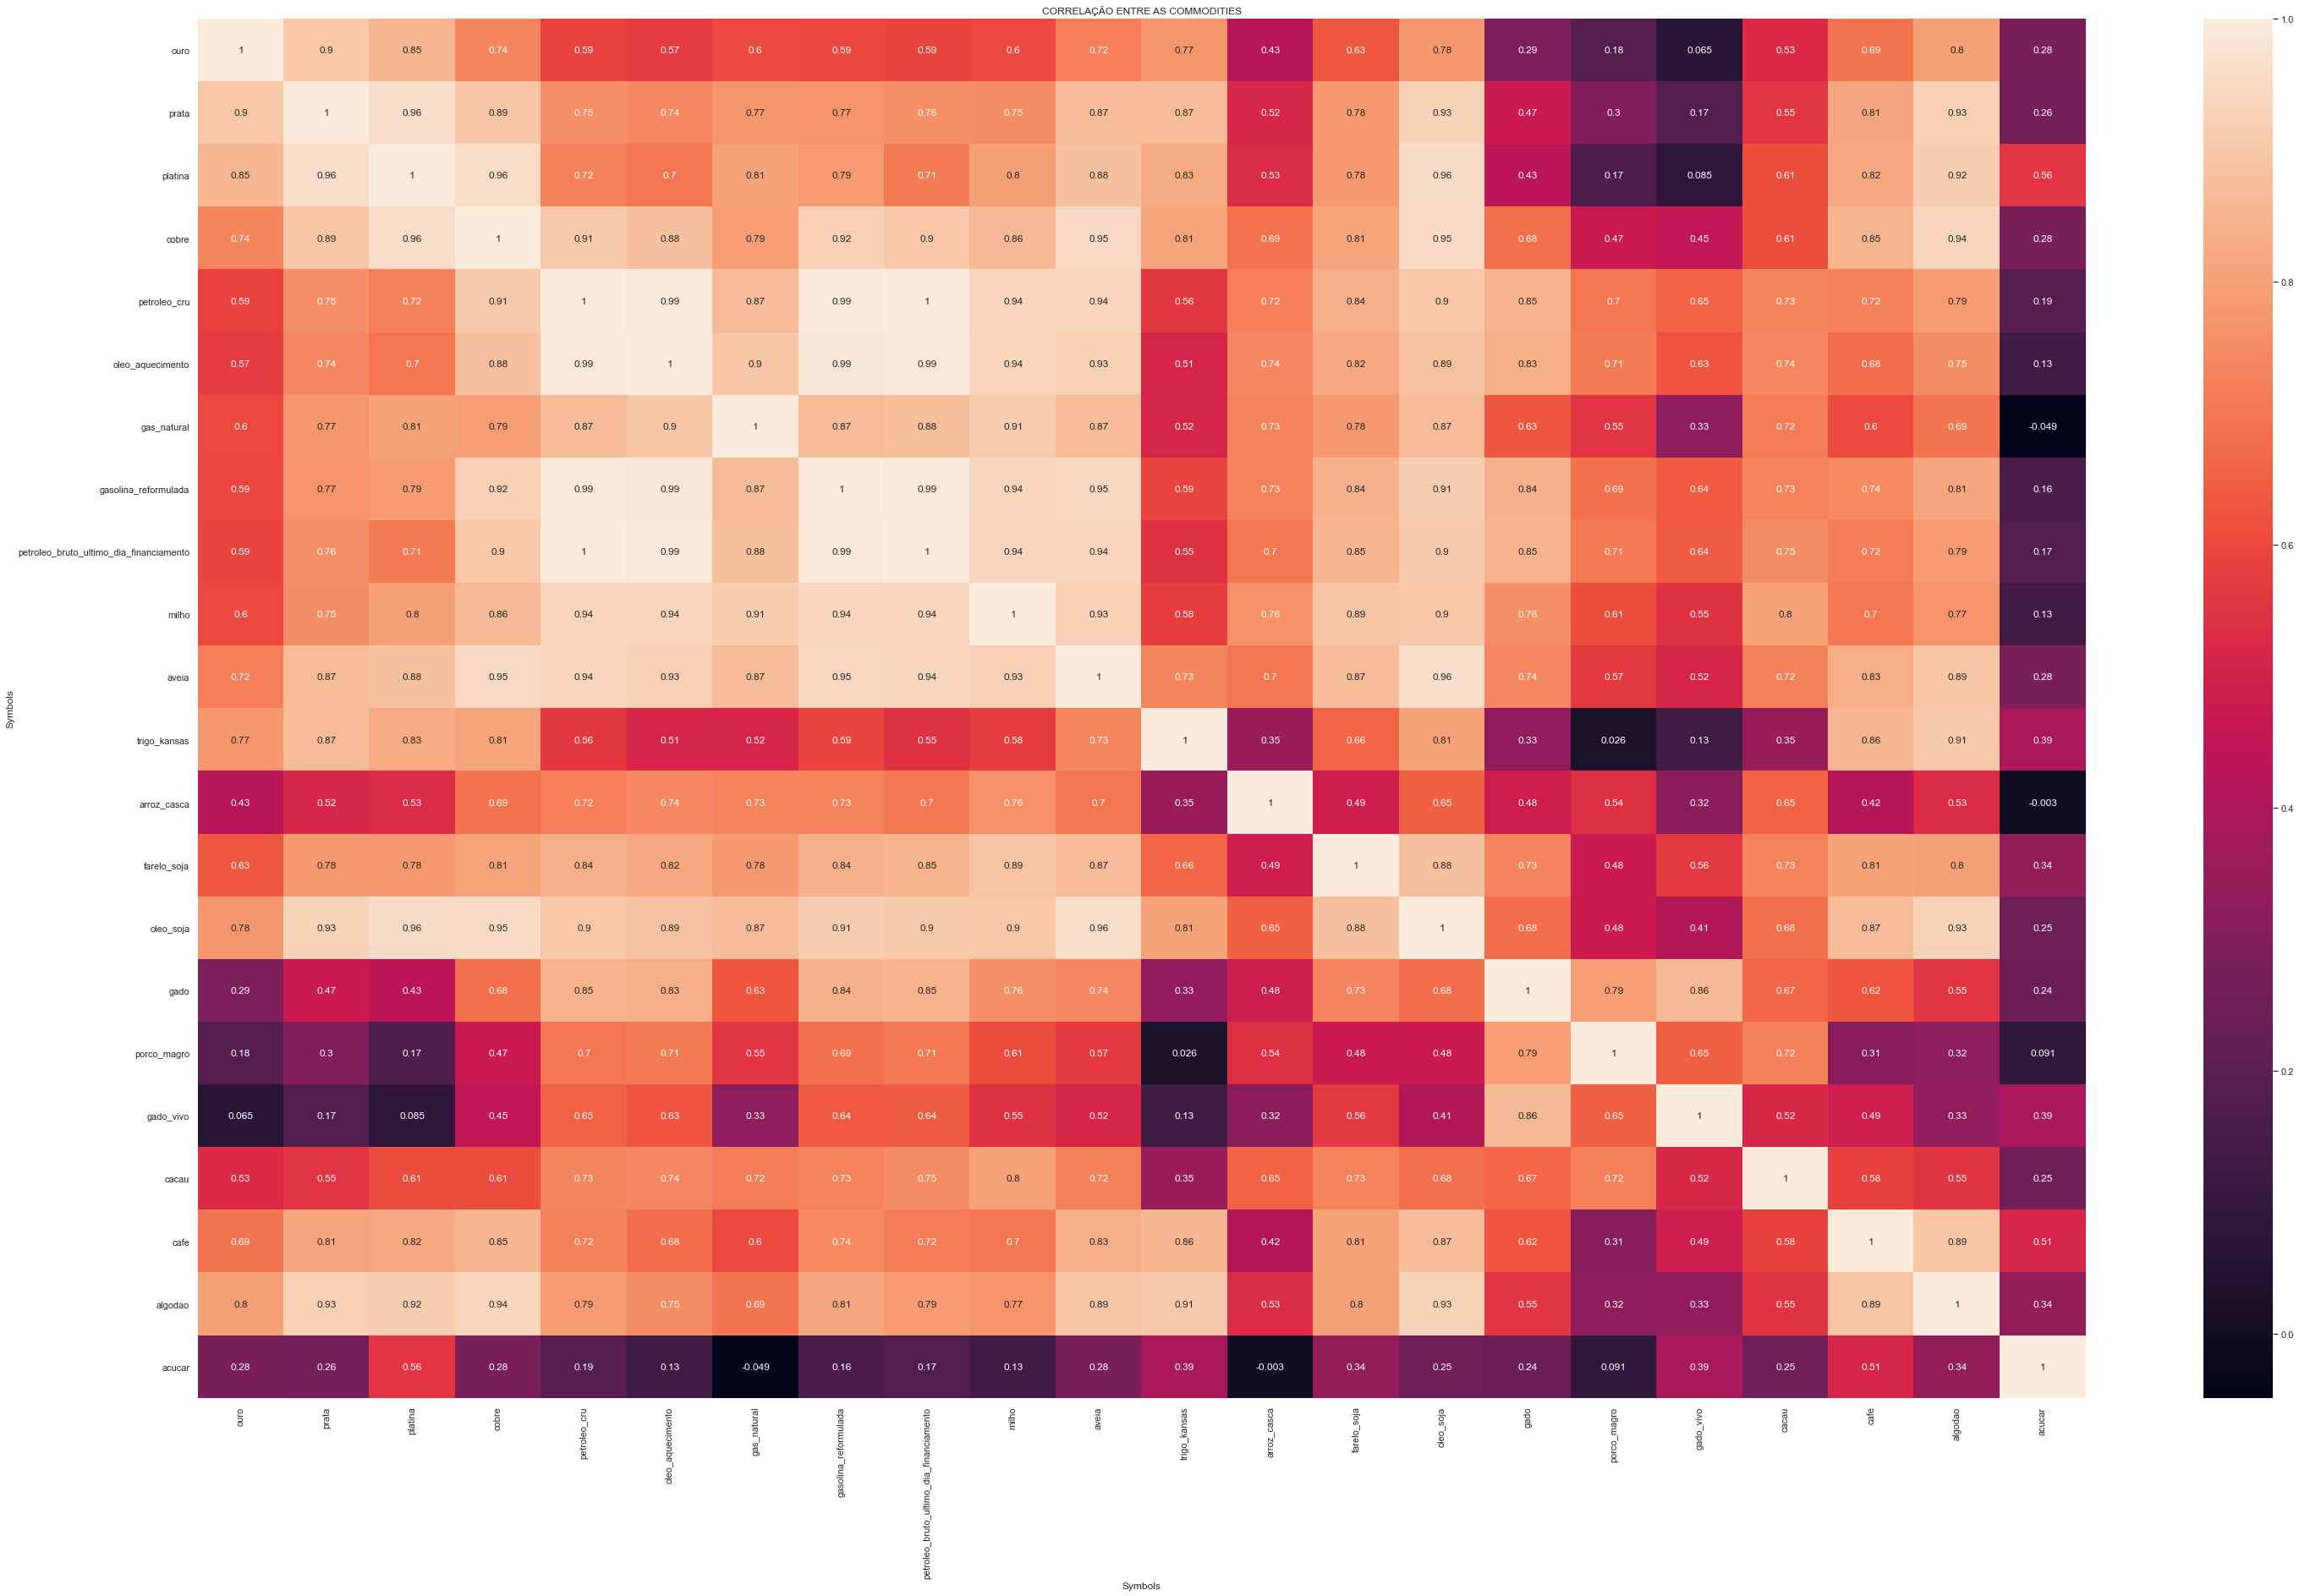

In [35]:
plt.figure(figsize=(50,30))
plt.title("CORRELAÇÃO ENTRE AS COMMODITIES")
sns.heatmap(data=commodities_data_v1.corr(), annot=True)

#  COMMODTIES CORRELATION MATRIX  2008 - 2020

In [36]:
tick = ["GC=F", "SI=F", "PL=F", "HG=F", "PA=F", "CL=F", "HO=F", "NG=F", "RB=F", "BZ=F", "B0=F",
          "ZC=F", "ZO=F", "KE=F", "ZR=F", "ZM=F", "ZL=F", "GF=F", "HE=F", "LE=F", "CC=F", "KC=F", "CT=F",
          "LB=F", "OJ=F", "SB=F"]
data_yahoo_v3 = web.get_data_yahoo(tickers, start="2008-01-01", end="2020-12-31")["Adj Close"]

In [37]:
data_yahoo_v3.head()

Symbols,GC=F,SI=F,PL=F,HG=F,PA=F,CL=F,HO=F,NG=F,RB=F,BZ=F,ZC=F,ZO=F,KE=F,ZR=F,ZM=F,ZL=F,GF=F,HE=F,LE=F,CC=F,KC=F,CT=F,SB=F,B0=F,LB=F,OJ=F
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-01-02,857.000000,15.167,1547.000000,3.0505,NaN,99.620003,2.7404,7.850,2.5689,97.839996,462.50,312.00,936.00,1396.0,338.000000,49.959999,104.425003,57.174999,96.250000,2097.0,134.000000,68.879997,10.73,NaN,NaN,NaN
2008-01-03,866.400024,15.382,1541.800049,3.1730,NaN,99.180000,2.7191,7.674,2.5414,97.599998,466.00,325.50,965.50,1395.0,344.100006,50.500000,101.800003,56.474998,94.775002,2120.0,135.199997,68.709999,11.14,NaN,NaN,NaN
2008-01-04,863.099976,15.346,1539.099976,3.1415,NaN,97.910004,2.6835,7.841,2.5110,96.790001,466.75,329.75,945.75,1400.5,342.000000,50.549999,100.324997,56.400002,94.550003,2098.0,132.699997,68.690002,11.32,NaN,NaN,NaN
2008-01-07,859.599976,15.180,1524.199951,3.1250,NaN,95.089996,2.5935,7.879,2.4298,94.389999,466.25,326.50,915.75,1394.0,337.899994,50.200001,100.425003,55.700001,94.599998,2131.0,131.399994,68.949997,11.37,NaN,NaN,NaN
2008-01-08,878.000000,15.707,1553.599976,3.2735,NaN,96.330002,2.6363,7.967,2.4739,95.540001,478.75,332.50,909.25,1430.0,346.500000,50.509998,100.224998,55.875000,94.074997,2156.0,135.449997,69.430000,11.37,NaN,NaN,NaN


In [38]:
data_yahoo_v3.tail()

Symbols,GC=F,SI=F,PL=F,HG=F,PA=F,CL=F,HO=F,NG=F,RB=F,BZ=F,ZC=F,ZO=F,KE=F,ZR=F,ZM=F,ZL=F,GF=F,HE=F,LE=F,CC=F,KC=F,CT=F,SB=F,B0=F,LB=F,OJ=F
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-23,1874.699951,25.823999,1016.200012,3.552,2326.300049,48.119999,1.4975,2.608,1.3820,51.200001,447.25,336.25,588.00,1239.0,421.200012,41.349998,140.274994,67.849998,111.925003,2557.0,124.550003,76.139999,14.83,NaN,NaN,NaN
2020-12-28,1877.199951,26.459999,1042.199951,3.570,2339.000000,47.619999,1.4790,2.305,1.3677,50.860001,456.50,336.75,577.00,1199.5,415.299988,41.720001,141.000000,66.500000,113.050003,2560.0,123.349998,76.349998,14.98,NaN,NaN,NaN
2020-12-29,1879.699951,26.138000,1055.699951,3.553,2331.500000,48.000000,1.4868,2.467,1.3879,51.090000,466.00,339.00,585.00,1220.5,427.000000,42.480000,139.625000,67.199997,112.050003,2507.0,125.400002,77.010002,15.04,NaN,NaN,NaN
2020-12-30,1891.000000,26.488001,1072.599976,3.543,2373.100098,48.400002,1.4898,2.422,1.4120,51.340000,474.50,349.00,601.25,1220.5,432.399994,42.669998,138.524994,67.599998,112.125000,2597.0,125.400002,77.970001,15.28,NaN,NaN,NaN
2020-12-31,1893.099976,26.332001,1075.400024,3.514,2448.500000,48.520000,1.4763,2.539,1.4084,NaN,484.00,360.75,603.50,1240.0,434.399994,43.330002,138.949997,70.275002,112.949997,2603.0,128.250000,78.120003,15.49,NaN,NaN,NaN


In [39]:
mapa = {
    'GC=F' : 'ouro',
    'SI=F' : 'prata',
    "PL=F" : 'platina',
    "HG=F" : 'cobre',
    "PA=F" : 'paladio',
    "CL=F" : 'petroleo_cru',
    "HO=F" : 'oleo_aquecimento',
    "NG=F" : 'gas_natural',
    "RB=F" : 'gasolina_reformulada',
    "BZ=F" : 'petroleo_bruto_ultimo_dia_financiamento',
    "B0=F" : 'propano_mb',
    "ZC=F" : 'milho',
    "ZO=F" : 'aveia',
    "KE=F" : 'trigo_kansas',
    "ZR=F" : 'arroz_casca',
    "ZM=F" : 'farelo_soja',
    "ZL=F" : 'oleo_soja',
    "ZS=F" : 'soja',
    "GF=F" : 'gado',
    "HE=F" : 'porco_magro',
    "LE=F" : 'gado_vivo',
    "CC=F" : 'cacau',
    "KC=F" : 'cafe',
    "CT=F" : 'algodao',
    "LB=F" : 'madeira_serrada',
    "OJ=F" : 'suco_laranja',
    "SB=F" : 'acucar'
}

commodities_data_v2 = data_yahoo_v3.rename(columns=mapa)
commodities_data_v2.head()

Symbols,ouro,prata,platina,cobre,paladio,petroleo_cru,oleo_aquecimento,gas_natural,gasolina_reformulada,petroleo_bruto_ultimo_dia_financiamento,milho,aveia,trigo_kansas,arroz_casca,farelo_soja,oleo_soja,gado,porco_magro,gado_vivo,cacau,cafe,algodao,acucar,propano_mb,madeira_serrada,suco_laranja
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-01-02,857.000000,15.167,1547.000000,3.0505,NaN,99.620003,2.7404,7.850,2.5689,97.839996,462.50,312.00,936.00,1396.0,338.000000,49.959999,104.425003,57.174999,96.250000,2097.0,134.000000,68.879997,10.73,NaN,NaN,NaN
2008-01-03,866.400024,15.382,1541.800049,3.1730,NaN,99.180000,2.7191,7.674,2.5414,97.599998,466.00,325.50,965.50,1395.0,344.100006,50.500000,101.800003,56.474998,94.775002,2120.0,135.199997,68.709999,11.14,NaN,NaN,NaN
2008-01-04,863.099976,15.346,1539.099976,3.1415,NaN,97.910004,2.6835,7.841,2.5110,96.790001,466.75,329.75,945.75,1400.5,342.000000,50.549999,100.324997,56.400002,94.550003,2098.0,132.699997,68.690002,11.32,NaN,NaN,NaN
2008-01-07,859.599976,15.180,1524.199951,3.1250,NaN,95.089996,2.5935,7.879,2.4298,94.389999,466.25,326.50,915.75,1394.0,337.899994,50.200001,100.425003,55.700001,94.599998,2131.0,131.399994,68.949997,11.37,NaN,NaN,NaN
2008-01-08,878.000000,15.707,1553.599976,3.2735,NaN,96.330002,2.6363,7.967,2.4739,95.540001,478.75,332.50,909.25,1430.0,346.500000,50.509998,100.224998,55.875000,94.074997,2156.0,135.449997,69.430000,11.37,NaN,NaN,NaN


In [40]:
commodities_data_v2.tail()

Symbols,ouro,prata,platina,cobre,paladio,petroleo_cru,oleo_aquecimento,gas_natural,gasolina_reformulada,petroleo_bruto_ultimo_dia_financiamento,milho,aveia,trigo_kansas,arroz_casca,farelo_soja,oleo_soja,gado,porco_magro,gado_vivo,cacau,cafe,algodao,acucar,propano_mb,madeira_serrada,suco_laranja
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-23,1874.699951,25.823999,1016.200012,3.552,2326.300049,48.119999,1.4975,2.608,1.3820,51.200001,447.25,336.25,588.00,1239.0,421.200012,41.349998,140.274994,67.849998,111.925003,2557.0,124.550003,76.139999,14.83,NaN,NaN,NaN
2020-12-28,1877.199951,26.459999,1042.199951,3.570,2339.000000,47.619999,1.4790,2.305,1.3677,50.860001,456.50,336.75,577.00,1199.5,415.299988,41.720001,141.000000,66.500000,113.050003,2560.0,123.349998,76.349998,14.98,NaN,NaN,NaN
2020-12-29,1879.699951,26.138000,1055.699951,3.553,2331.500000,48.000000,1.4868,2.467,1.3879,51.090000,466.00,339.00,585.00,1220.5,427.000000,42.480000,139.625000,67.199997,112.050003,2507.0,125.400002,77.010002,15.04,NaN,NaN,NaN
2020-12-30,1891.000000,26.488001,1072.599976,3.543,2373.100098,48.400002,1.4898,2.422,1.4120,51.340000,474.50,349.00,601.25,1220.5,432.399994,42.669998,138.524994,67.599998,112.125000,2597.0,125.400002,77.970001,15.28,NaN,NaN,NaN
2020-12-31,1893.099976,26.332001,1075.400024,3.514,2448.500000,48.520000,1.4763,2.539,1.4084,NaN,484.00,360.75,603.50,1240.0,434.399994,43.330002,138.949997,70.275002,112.949997,2603.0,128.250000,78.120003,15.49,NaN,NaN,NaN


<AxesSubplot:title={'center':'CORRELAÇÃO ENTRE AS COMMODITIES 2008 - 2020'}, xlabel='Symbols', ylabel='Symbols'>

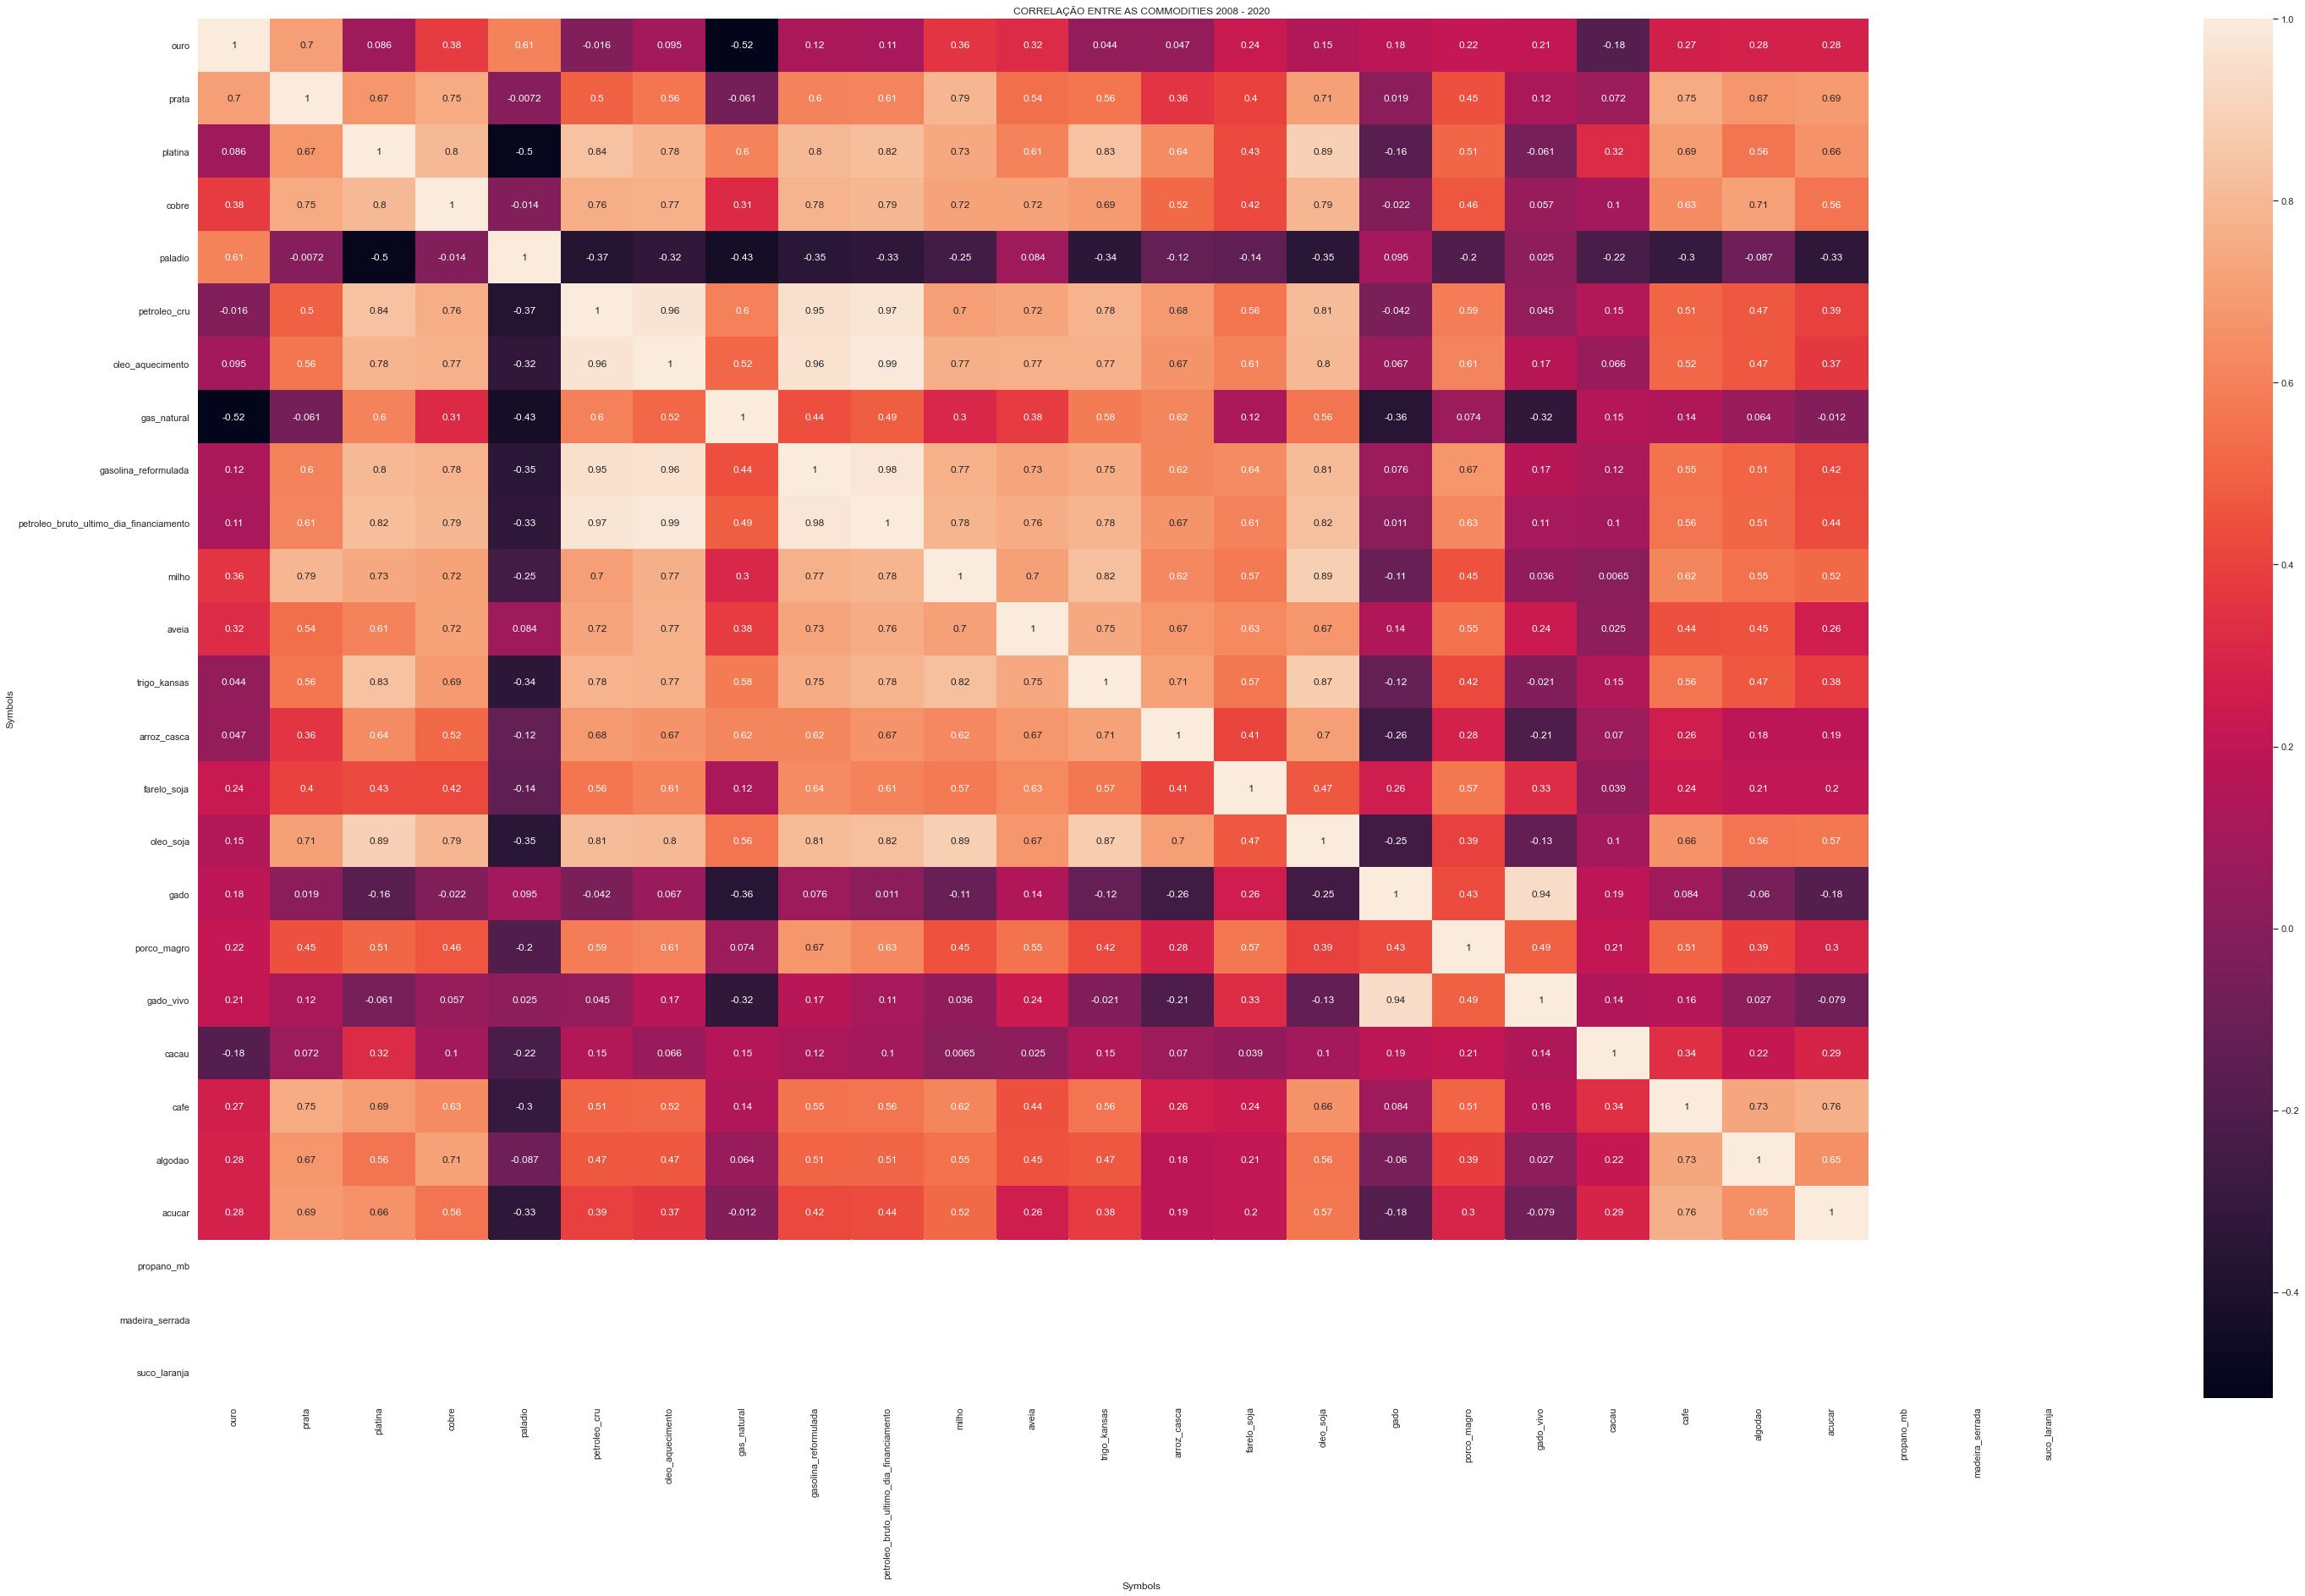

In [41]:
plt.figure(figsize=(50,30))
plt.title("CORRELAÇÃO ENTRE AS COMMODITIES 2008 - 2020")
sns.heatmap(data=commodities_data_v2.corr(), annot=True)

In [42]:
retorno_v2 = commodities_data_v2.pct_change()
retorno_v2

Symbols,ouro,prata,platina,cobre,paladio,petroleo_cru,oleo_aquecimento,gas_natural,gasolina_reformulada,petroleo_bruto_ultimo_dia_financiamento,milho,aveia,trigo_kansas,arroz_casca,farelo_soja,oleo_soja,gado,porco_magro,gado_vivo,cacau,cafe,algodao,acucar,propano_mb,madeira_serrada,suco_laranja
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,0.010969,0.014176,-0.003361,0.040157,NaN,-0.004417,-0.007773,-0.022420,-0.010705,-0.002453,0.007568,0.043269,0.031517,-0.000716,0.018047,0.010809,-0.025138,-0.012243,-0.015325,0.010968,0.008955,-0.002468,0.038211,NaN,NaN,NaN
2008-01-04,-0.003809,-0.002340,-0.001751,-0.009928,NaN,-0.012805,-0.013093,0.021762,-0.011962,-0.008299,0.001609,0.013057,-0.020456,0.003943,-0.006103,0.000990,-0.014489,-0.001328,-0.002374,-0.010377,-0.018491,-0.000291,0.016158,NaN,NaN,NaN
2008-01-07,-0.004055,-0.010817,-0.009681,-0.005252,NaN,-0.028802,-0.033538,0.004846,-0.032338,-0.024796,-0.001071,-0.009856,-0.031721,-0.004641,-0.011988,-0.006924,0.000997,-0.012411,0.000529,0.015729,-0.009797,0.003785,0.004417,NaN,NaN,NaN
2008-01-08,0.021405,0.034717,0.019289,0.047520,NaN,0.013040,0.016503,0.011169,0.018150,0.012184,0.026810,0.018377,-0.007098,0.025825,0.025451,0.006175,-0.001992,0.003142,-0.005550,0.011732,0.030822,0.006962,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,0.004339,0.015334,0.007635,0.009665,0.006577,0.023394,0.024562,-0.061870,0.031728,0.022364,0.008455,-0.001485,0.015106,0.002022,0.014940,0.019729,0.002680,0.027641,0.014503,0.008679,0.002818,0.017642,0.019945,NaN,NaN,NaN
2020-12-28,0.001334,0.024628,0.025585,0.005068,0.005459,-0.010391,-0.012354,-0.116181,-0.010347,-0.006641,0.020682,0.001487,-0.018707,-0.031881,-0.014008,0.008948,0.005168,-0.019897,0.010051,0.001173,-0.009635,0.002758,0.010115,NaN,NaN,NaN
2020-12-29,0.001332,-0.012169,0.012953,-0.004762,-0.003206,0.007980,0.005274,0.070282,0.014769,0.004522,0.020811,0.006682,0.013865,0.017507,0.028172,0.018217,-0.009752,0.010526,-0.008846,-0.020703,0.016619,0.008644,0.004005,NaN,NaN,NaN


In [43]:
retorno_acumulado_v2 = (1+ retorno_v2).cumprod()
retorno_acumulado_v2.iloc[0] = 1
retorno_acumulado_v2

Symbols,ouro,prata,platina,cobre,paladio,petroleo_cru,oleo_aquecimento,gas_natural,gasolina_reformulada,petroleo_bruto_ultimo_dia_financiamento,milho,aveia,trigo_kansas,arroz_casca,farelo_soja,oleo_soja,gado,porco_magro,gado_vivo,cacau,cafe,algodao,acucar,propano_mb,madeira_serrada,suco_laranja
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0
2008-01-03,1.010969,1.014176,0.996639,1.040157,NaN,0.995583,0.992227,0.977580,0.989295,0.997547,1.007568,1.043269,1.031517,0.999284,1.018047,1.010809,0.974862,0.987757,0.984675,1.010968,1.008955,0.997532,1.038211,NaN,NaN,NaN
2008-01-04,1.007118,1.011802,0.994893,1.029831,NaN,0.982835,0.979237,0.998854,0.977461,0.989268,1.009189,1.056891,1.010417,1.003223,1.011834,1.011809,0.960737,0.986445,0.982338,1.000477,0.990298,0.997242,1.054986,NaN,NaN,NaN
2008-01-07,1.003034,1.000857,0.985262,1.024422,NaN,0.954527,0.946395,1.003694,0.945852,0.964738,1.008108,1.046474,0.978365,0.998567,0.999704,1.004804,0.961695,0.974202,0.982857,1.016214,0.980597,1.001016,1.059646,NaN,NaN,NaN
2008-01-08,1.024504,1.035604,1.004266,1.073103,NaN,0.966974,0.962013,1.014904,0.963019,0.976492,1.035135,1.065705,0.971421,1.024355,1.025148,1.011009,0.959780,0.977263,0.977403,1.028135,1.010821,1.007985,1.059646,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,2.187515,1.702644,0.656884,1.164399,3.974883,0.483036,0.546453,0.332229,0.537973,0.523303,0.967027,1.077724,0.628205,0.887536,1.246154,0.827662,1.343308,1.186707,1.162857,1.219361,0.929478,1.105401,1.382106,NaN,NaN,NaN
2020-12-28,2.190432,1.744577,0.673691,1.170300,3.996583,0.478016,0.539702,0.293631,0.532407,0.519828,0.987027,1.079327,0.616453,0.859241,1.228698,0.835068,1.350251,1.163096,1.174545,1.220792,0.920522,1.108449,1.396086,NaN,NaN,NaN
2020-12-29,2.193349,1.723347,0.682418,1.164727,3.983768,0.481831,0.542549,0.314268,0.540270,0.522179,1.007568,1.086538,0.625000,0.874284,1.263314,0.850280,1.337084,1.175339,1.164156,1.195517,0.935821,1.118031,1.401678,NaN,NaN,NaN


In [44]:
retorno_anual_v2 = (retorno_acumulado_v2 -1) *100
retorno_anual_v2

Symbols,ouro,prata,platina,cobre,paladio,petroleo_cru,oleo_aquecimento,gas_natural,gasolina_reformulada,petroleo_bruto_ultimo_dia_financiamento,milho,aveia,trigo_kansas,arroz_casca,farelo_soja,oleo_soja,gado,porco_magro,gado_vivo,cacau,cafe,algodao,acucar,propano_mb,madeira_serrada,suco_laranja
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2008-01-03,1.096852,1.417552,-0.336131,4.015741,NaN,-0.441681,-0.777262,-2.242040,-1.070503,-0.245296,0.756757,4.326923,3.151709,-0.071633,1.804736,1.080867,-2.513766,-1.224313,-1.532466,1.096805,0.895520,-0.246803,3.821070,NaN,NaN,NaN
2008-01-04,0.711782,1.180193,-0.510667,2.983120,NaN,-1.716522,-2.076340,-0.114647,-2.253890,-1.073176,0.918919,5.689103,1.041667,0.322350,1.183432,1.180945,-3.926269,-1.355484,-1.766231,0.047687,-0.970152,-0.275835,5.498604,NaN,NaN,NaN
2008-01-07,0.303381,0.085716,-1.473823,2.442225,NaN,-4.547286,-5.360538,0.369430,-5.414772,-3.526162,0.810811,4.647436,-2.163462,-0.143266,-0.029588,0.480388,-3.830500,-2.579796,-1.714287,1.621364,-1.940303,0.101626,5.964589,NaN,NaN,NaN
2008-01-08,2.450408,3.560361,0.426631,7.310279,NaN,-3.302551,-3.798715,1.490447,-3.698082,-2.350772,3.513514,6.570513,-2.857906,2.435530,2.514793,1.100879,-4.022030,-2.273720,-2.259743,2.813543,1.082087,0.798495,5.964589,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,118.751453,70.264388,-34.311570,16.439933,297.488261,-51.696449,-45.354696,-66.777069,-46.202658,-47.669662,-3.297297,7.772436,-37.179487,-11.246418,24.615388,-17.233789,34.330850,18.670747,16.285717,21.936099,-7.052237,10.540073,38.210630,NaN,NaN,NaN
2020-12-28,119.043168,74.457700,-32.630902,17.029996,299.658266,-52.198356,-46.029779,-70.636941,-46.759316,-48.017168,-1.297297,7.932692,-38.354701,-14.075931,22.869819,-16.493191,35.025134,16.309577,17.454549,22.079161,-7.947762,10.844950,39.608576,NaN,NaN,NaN
2020-12-29,119.334883,72.334679,-31.758245,16.472712,298.376762,-51.816906,-45.745150,-68.573248,-45.972987,-47.782091,0.756757,8.653846,-37.500000,-12.571633,26.331361,-14.971977,33.708399,17.533883,16.415588,19.551741,-6.417909,11.803143,40.167760,NaN,NaN,NaN


In [45]:
acumulado_anual_v2 = retorno_anual_v2.iloc[3328::]
pd.options.display.max_columns = None
acumulado_anual_v2.head()

Symbols,ouro,prata,platina,cobre,paladio,petroleo_cru,oleo_aquecimento,gas_natural,gasolina_reformulada,petroleo_bruto_ultimo_dia_financiamento,milho,aveia,trigo_kansas,arroz_casca,farelo_soja,oleo_soja,gado,porco_magro,gado_vivo,cacau,cafe,algodao,acucar,propano_mb,madeira_serrada,suco_laranja
Date,,,,,,,,,,,,,,,,,,,,,,,,,,


In [46]:
data_V1 = {'COMMODITIES': ['ouro', 'prata', 'platina' ,'cobre', 'paladio', 'petroleo_cru' ,'oleo_aquecimento' ,'gas_natural' ,
                         'gasolina_reformulada' ,'petroleo_bruto_ultimo_dia_financiamento' ,'milho' ,'aveia',
                         'trigo_kansas' ,'arroz_casca' ,'farelo_soja' ,'oleo_soja' ,'gado', 'porco_magro' ,
                         'gado_vivo' ,'cacau' ,'cafe' ,'algodao' ,'acucar'],
                                 
        'RETORNO_PERIODO' : [120.89848, 73.613774, -30.484808, 15.194232, 318.368219, -51.294922, -46.128304, -67.65605, 
                           -45.174978, -47.526572, 4.648649, 15.625, -35.523504, -11.174785, 28.520708, -13.270611, 
                           33.061999, 22.912116, 17.350646, 24.129709, -4.291045, 13.414643, 44.361607]}
        

In [47]:
ret_v2= pd.DataFrame(data_V1)
ret_v2

,COMMODITIES,RETORNO_PERIODO
0,ouro,120.898480
1,prata,73.613774
2,platina,-30.484808
3,cobre,15.194232
4,paladio,318.368219
5,petroleo_cru,-51.294922
6,oleo_aquecimento,-46.128304
7,gas_natural,-67.656050
8,gasolina_reformulada,-45.174978
9,petroleo_bruto_ultimo_dia_financiamento,-47.526572


Text(0.5, 1.0, 'RETORNO NO PERIODO (%) | 2008 - 2020')

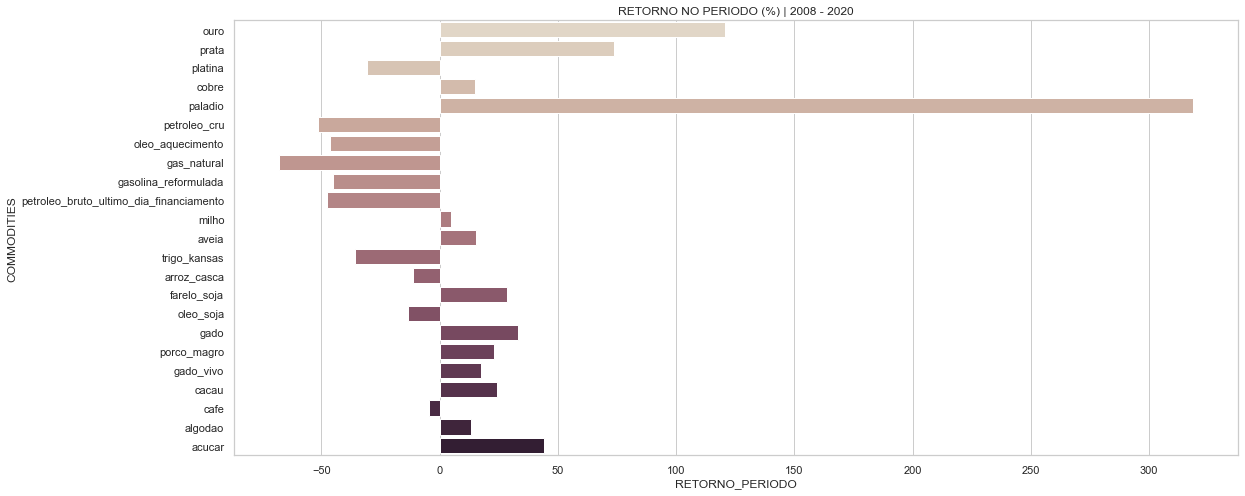

In [48]:
sns.barplot(y='COMMODITIES', x='RETORNO_PERIODO',
            data=ret_v2, palette='ch:.25').set_title('RETORNO NO PERIODO (%) | 2008 - 2020')

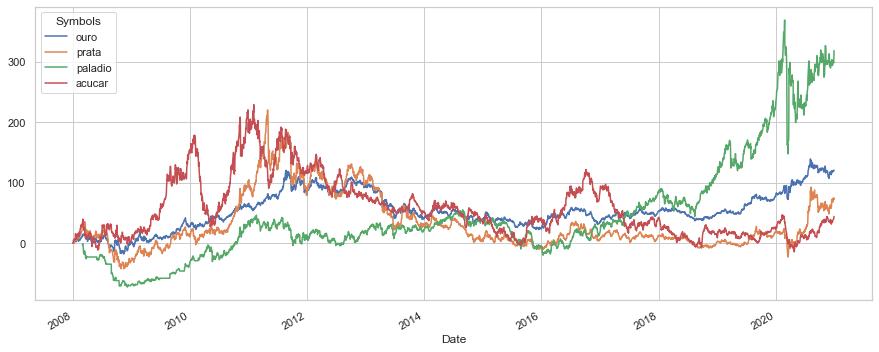

In [49]:
retorno_anual_v2[['ouro', 'prata', 'paladio', 'acucar']].plot(figsize = (15,6))
plt.show()

### Considering the entire period from January 2008 to December 2020, we can see the commodities that most appreciated. We can highlight palladium, which is a commodity linked to platinum. Its appreciation in recent years is basically due to two factors:
 - scarcity of the element, which is rare in nature
 - greater demand due to its efficiency with respect to CO2 emission

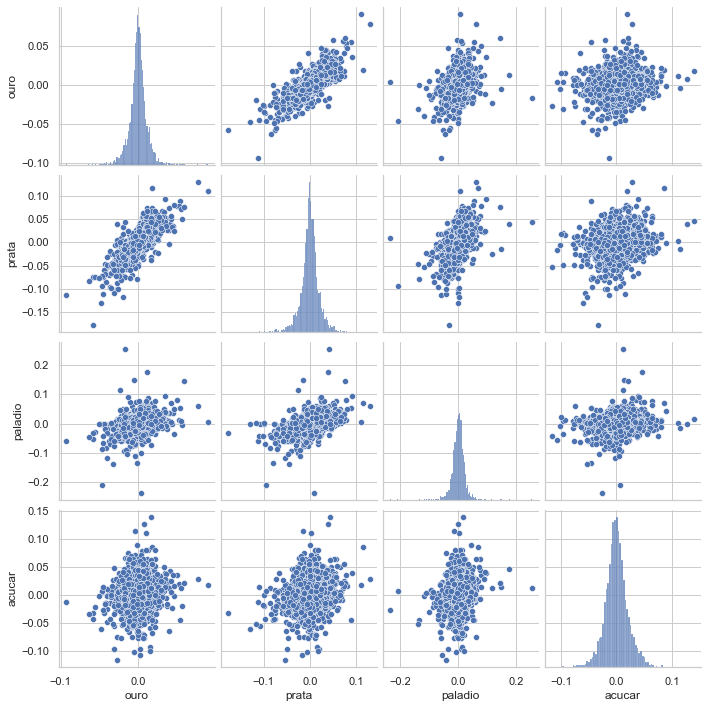

In [50]:
sns.pairplot(retorno_v2[['ouro', 'prata', 'paladio', 'acucar']].dropna())

### Through the boxplots of the percentage returns we can see how each commodity is distributed.

IndexError: index 12 is out of bounds for axis 0 with size 12

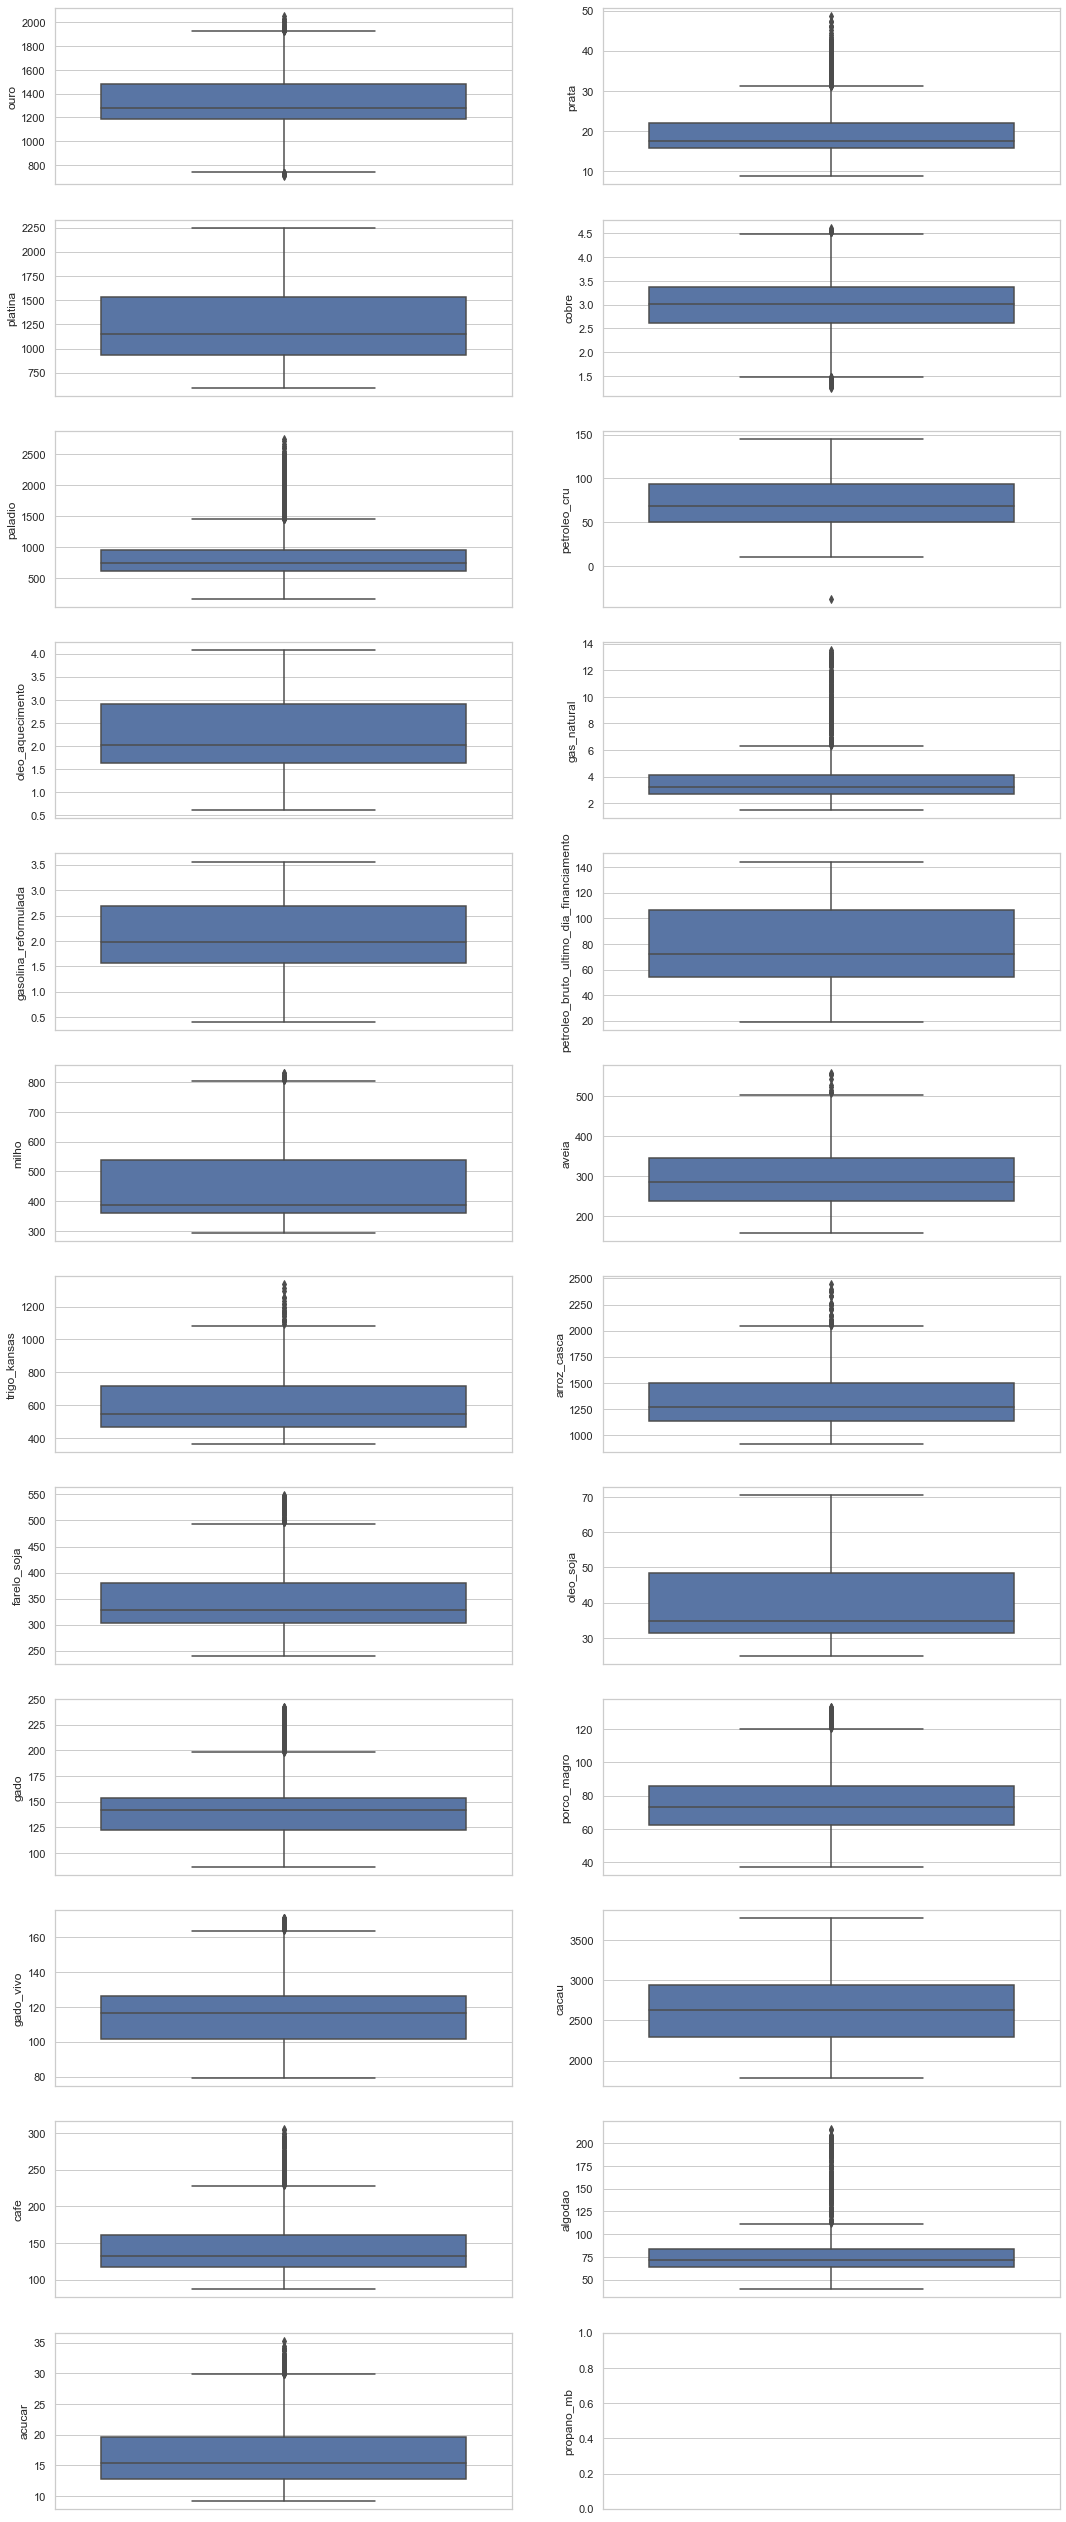

In [53]:
ncols = 2
nrows = 12
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(18,46))

for i, col in enumerate(commodities_data_v2):
    c = i % ncols
    r = i // ncols
    
    sns.boxplot(y=col, data=commodities_data_v2, ax=ax[r][c])

### Here we can see the relationship between the commodities that most appreciated in the period and the distribution of each one.


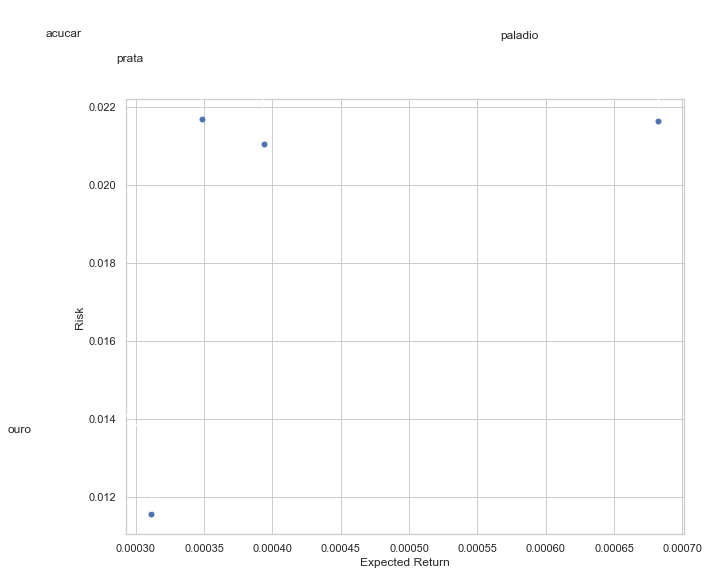

In [52]:
plt.figure(figsize=(10,8))

plt.scatter(retorno_v2[['ouro', 'prata', 'paladio', 'acucar']].mean(),
            retorno_v2[['ouro', 'prata', 'paladio', 'acucar']].std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


for label,x,y in zip(retorno_v2[['ouro', 'prata', 'paladio', 'acucar']].columns,
                     retorno_v2[['ouro', 'prata', 'paladio', 'acucar']].mean(),
                     retorno_v2[['ouro', 'prata', 'paladio', 'acucar']].std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,80),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle= "->",connectionstyle = "arc3,rad=-0.9"))

### We can see the relationship between return and risk of the commodities that most appreciated in the period. We see that palladium has a high expectation of return, as well as a higher risk. We also note that silver and sugar present a very high risk for a relatively low expected return.